#**SF Bay Area House Prices**

<img src="https://www.worldpropertyjournal.com/news-assets/San-Francisco-homes-california-keyimage.jpg" width=600>  
<font size=2 color=gray>Image Credit: World Property Journal</font>  


Bay Area real estate prices have been rapidly appreciating since 2012. Over the last decade, median property values have more than doubled, and some areas of the Bay Area have more than tripled!

The rapidly escalating prices are great for those that have already bought into the market. For potential homebuyers, these escalating prices result in getting less home for your dollar (and/or having to increase your budget), and gives pause as to not wanting to buy at the peak of the market.

Here is a data set of over 7,000 active listings from June 2019 containing factors influencing home prices across the region, including number of bedrooms and bathrooms, home size, lot size, school quality, and commute times. 

Here are the descriptions of the data:

- `Address` - the adddress of the house
- `City` - the city the house is at
- `State` - California, this data set is from the Bay Area
- `Zip` - postal zip code
- `Price` - listing price of the house
- `Beds` - number of bedrooms
- `Baths` - number of bathrooms
- `Home size` - the square footage of the house
- `Lot size` - the square footage of the lot 
- `Latitude` - latitude coordinate
- `Longitude` - longitude coodinate
- `SF time` - the commute time by car at 8 AM to San Francisco
- `PA time` - the commute time by car at 8 AM to commute to Palo Alto
- `School score` - the quality of the schools in the neighborhood
- `Commute time` - the commute time by car at 8 AM to the general Bay Area.

Data Source Credit: Michael Boles

###**Prediction**

You are tasked to build a ML model to predict the price of the homes in the SF Bay Area.

## Get data and Split Data
----

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings("ignore")

# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#for google colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# def enable_plotly_in_cell():
#     import IPython
#     from plotly.offline import init_notebook_mode
#     display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
#     init_notebook_mode(connected=False)

In [ ]:
import pandas as pd
data='https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv'
df = pd.read_csv(data)
df

Address            City State    Zip    Price  Beds   Baths  \
0       2412 Palmer Ave         Belmont    CA  94002  1459000     3 2.00000   
1      1909 Hillman Ave         Belmont    CA  94002  1595000     4 2.00000   
2     641 Waltermire St         Belmont    CA  94002   899999     2 1.00000   
3      2706 Sequoia Way         Belmont    CA  94002  1588000     3 2.00000   
4      1568 Winding Way         Belmont    CA  94002  1999000     4 3.50000   
...                 ...             ...   ...    ...      ...   ...     ...   
7140          The Davis  Mountain House    CA  95391   603990     5 3.00000   
7141       The Berkeley  Mountain House    CA  95391   619990     5 4.00000   
7142           Geranium  Mountain House    CA  95391   666340     5 4.00000   
7143     The Pepperdine  Mountain House    CA  95391   659990     5 4.00000   
7144       The Stanford  Mountain House    CA  95391   644990     5 4.00000   

      Home size    Lot size  Latitude  Longitude  SF time  PA time  \
0    1360.00000  5001.00000  37.51678 -122.30462       63       33   
1    2220.00000  3999.00000  37.52197 -122.29408       63       33   
2     840.00000  4234.00000  37.52023 -122.27314       63       33   
3    1860.00000  5210.00000  37.52019 -122.30944       63       33   
4    2900.00000 16117.20000  37.52428 -122.29124       63       33   
...         ...         ...       ...        ...      ...      ...   
7140 2327.00000         NaN  37.75644 -121.54772      120      125   
7141 2410.00000         NaN  37.75644 -121.54772      120      125   
7142 2486.00000         NaN  37.76472 -121.53776      120      125   
7143 2856.00000         NaN  37.75644 -121.54772      120      125   
7144 2679.00000         NaN  37.75644 -121.54772      120      125   

      School score  Commute time  
0         77.90000            33  
1         77.90000            33  
2         77.90000            33  
3         77.90000            33  
4         77.90000            33  
...            ...           ...  
7140      65.30000           120  
7141      65.30000           120  
7142      65.30000           120  
7143      65.30000           120  
7144      65.30000           120  

[7145 rows x 15 columns]

In [ ]:
# df[df.Price > 5000000]

In [ ]:
# split datta to numerical data and categorical data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']
num_df = df.select_dtypes(include=numerics)#.drop(columns = 'Price')
cat_df = df.select_dtypes(include=objects).drop(columns = ['Address', 'State'])


num_df.info(), print(), cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip           7145 non-null   int64  
 1   Price         7145 non-null   int64  
 2   Beds          7145 non-null   int64  
 3   Baths         7145 non-null   float64
 4   Home size     7063 non-null   float64
 5   Lot size      6880 non-null   float64
 6   Latitude      7145 non-null   float64
 7   Longitude     7145 non-null   float64
 8   SF time       7145 non-null   int64  
 9   PA time       7145 non-null   int64  
 10  School score  7085 non-null   float64
 11  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 670.0 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    7145 non-null   object
dtypes: object(1)
memory

(None, None, None)

# Visualization Part
---

## 1.Number of houses/Mean house price from the top 15 cities

Most crowded Top 15 city 
***

In [ ]:
df_city = df[['City','Price']].groupby(by = ['City']).count().reset_index().sort_values(by = 'Price', ascending = False)[:15]
df_city.City.unique()

array(['San Jose', 'Oakland', 'San Francisco', 'Vallejo', 'Hayward',
       'Concord', 'Fremont', 'Richmond', 'Walnut Creek', 'Los Gatos',
       'Martinez', 'Novato', 'Berkeley', 'San Ramon', 'Santa Clara'],
      dtype=object)

In [ ]:
df_city

City  Price
94        San Jose    822
70         Oakland    504
91   San Francisco    470
113        Vallejo    223
40         Hayward    204
20         Concord    174
37         Fremont    172
85        Richmond    153
114   Walnut Creek    146
53       Los Gatos    131
54        Martinez    127
69          Novato    123
9         Berkeley    120
100      San Ramon    118
101    Santa Clara    108

In [ ]:
df[df['City'] == 'San Jose'].Price.mean()

1315081.8102189782

In [ ]:
df_city_mean = df[['City','Price']].groupby(by = ['City']).median().reset_index().sort_values(by = 'Price', ascending = False)
df_city_mean

l = [df[df['City'] == i].Price.median() for i in df_city.City.unique()]
l

[1180000.0,
 748000.0,
 1398500.0,
 450000.0,
 729975.0,
 634250.0,
 1196500.0,
 530000.0,
 1199005.0,
 2799000.0,
 625000.0,
 1100000.0,
 1298500.0,
 1177000.0,
 1399000.0]

In [ ]:
# Run configure_plotly_browser_state() if you are in Google colab
configure_plotly_browser_state()

# df2016 = uni[uni.year == 2016].iloc[:5,:]
pie1 = df_city.Price
# pie1_list = [float(each.replace(',', '')) for each in df_city.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4

pie1_list = [int(each) for each in df_city.Price]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
text = [int(each) for each in df_city_mean.Price]  # str(2,4) => str(2.4) = > float(2.4) = 2.4

labels = df_city.City
# labels = l

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "City info",
      "text": l,
      "hovertemplate":"%{label}: <br>Percent: %{percent} </br> mean price of houses: %{text}",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Number of houses/Mean house price from the top 15 cities",
        "annotations": [
            { "font": { "size": 12},
              "showarrow": False,
              "text": " ",
                "x": 0.5,
                "y": 0.8
            },
        ]
    }
}
iplot(fig)

## 2.Visualize with latitude and longitude
location of each house and show price with color
***

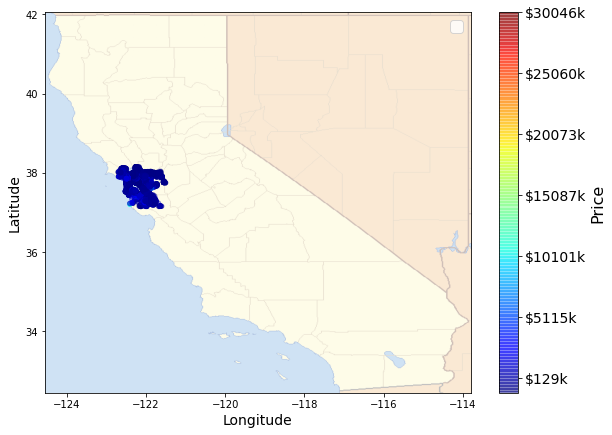

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread('https://www.sjsu.edu/people/wendy.lee/pics/CS122/california.png')
                            
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),
                    #    s=df['Price']/100, label="Price",
                       c="Price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["Price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [ ]:
# df2016 = uni[uni.year == 2016].iloc[:20,:]
# _size  = [float(each.replace(',', '.')) for each in df2016.num_students]

configure_plotly_browser_state()

price_color = [float(each) for each in df.Price]

data = [
   {
       'y': df.Latitude,
       'x': df.Longitude,
       'mode': 'markers',
       'marker': {
            'color': price_color,
            # 'size': price_color,
            'showscale': True
       },
       "text" :  df.City   
    }
]
layout = {
  'title': 'The location of houses in CA and Price ',
  'xaxis' : dict(title = "Latitude"),       
  'yaxis' : dict(title = "Longitude") 
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Some outliers are much higher than others...

can not see any differences,,,

Let's see the under 5M

In [ ]:
df_under = df[df['Price'] < 5000000 ] #under 5M
print("data size : ", len(df_under), '\n')
# _size  = [float(each.replace(',', '.')) for each in df2016.num_students]

configure_plotly_browser_state()

price_color = [float(each) for each in df_under.Price]

data = [
   {
       'y': df_under.Latitude,
       'x': df_under.Longitude,
       'mode': 'markers',
       'marker': {
            'color': price_color,
            # 'size': price_color,
            'showscale': True
       },
       "text" :  df_under.City   
    }
]
layout = {
  'title': 'The location of houses in CA and Price ',
  'xaxis' : dict(title = "Latitude"),       
  'yaxis' : dict(title = "Longitude") 
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

data size :  6859 



High price of houses are gathered in specific area. Location feature will significantly effect for ML training.

## 3.Comparison of variance differences according to zip codes 

Houses in adjacent locations use the same zip code. If similar house prices are formed in similar areas, the variance within the same house code will be small.

## how to prove?
Let's compare,

- `variance in entire data` and `variance in each zipcode`


- if variance in entire data > variance in each zipcode, means that house prices within the same zip code are `similar`

***

In [ ]:
from numpy import nan

def std_per(df):
  cnt = 0
  df_temp = df
  total_std = df_temp.Price.dropna().var(ddof=0)

  for code in df_temp.Zip.unique():
    zip_price = df_temp[ df_temp.Zip == code].Price.var(ddof=0)
    if zip_price < total_std:
      cnt += 1
    else:
      pass
  
  # get percent
  percent = round(cnt / len(df_temp.Zip.unique()) * 100,2 )
  print(f"{ percent}% of Zip code group has lower variation than the variation of entire data price")
  return percent
      
std_per(df)

91.16% of Zip code group has lower variation than the variation of entire data price


91.16

In [ ]:
total_var = pd.DataFrame(index = [0], data = {'Zip' : 'Total', 'Price': df.Price.var(ddof=0)})
total_var

Zip               Price
0  Total 5795694280188.96973

In [ ]:
df_zip = df[['Zip', 'Price']].groupby(by = ['Zip']).var(ddof=0).reset_index()
df_zip = df_zip.append(total_var, ignore_index = True)
# df_zip = df_zip.set_index(keys = 'Zip')
df_zip

Zip               Price
0    94002  177364871542.92349
1    94005  125868750000.00000
2    94010 8692302136289.88477
3    94014   62342786852.25893
4    94015   16532747742.22222
..     ...                 ...
211  95140             0.00000
212  95148  259994681303.37500
213  95304    7762449600.00000
214  95391    7372333161.72250
215  Total 5795694280188.96973

[216 rows x 2 columns]

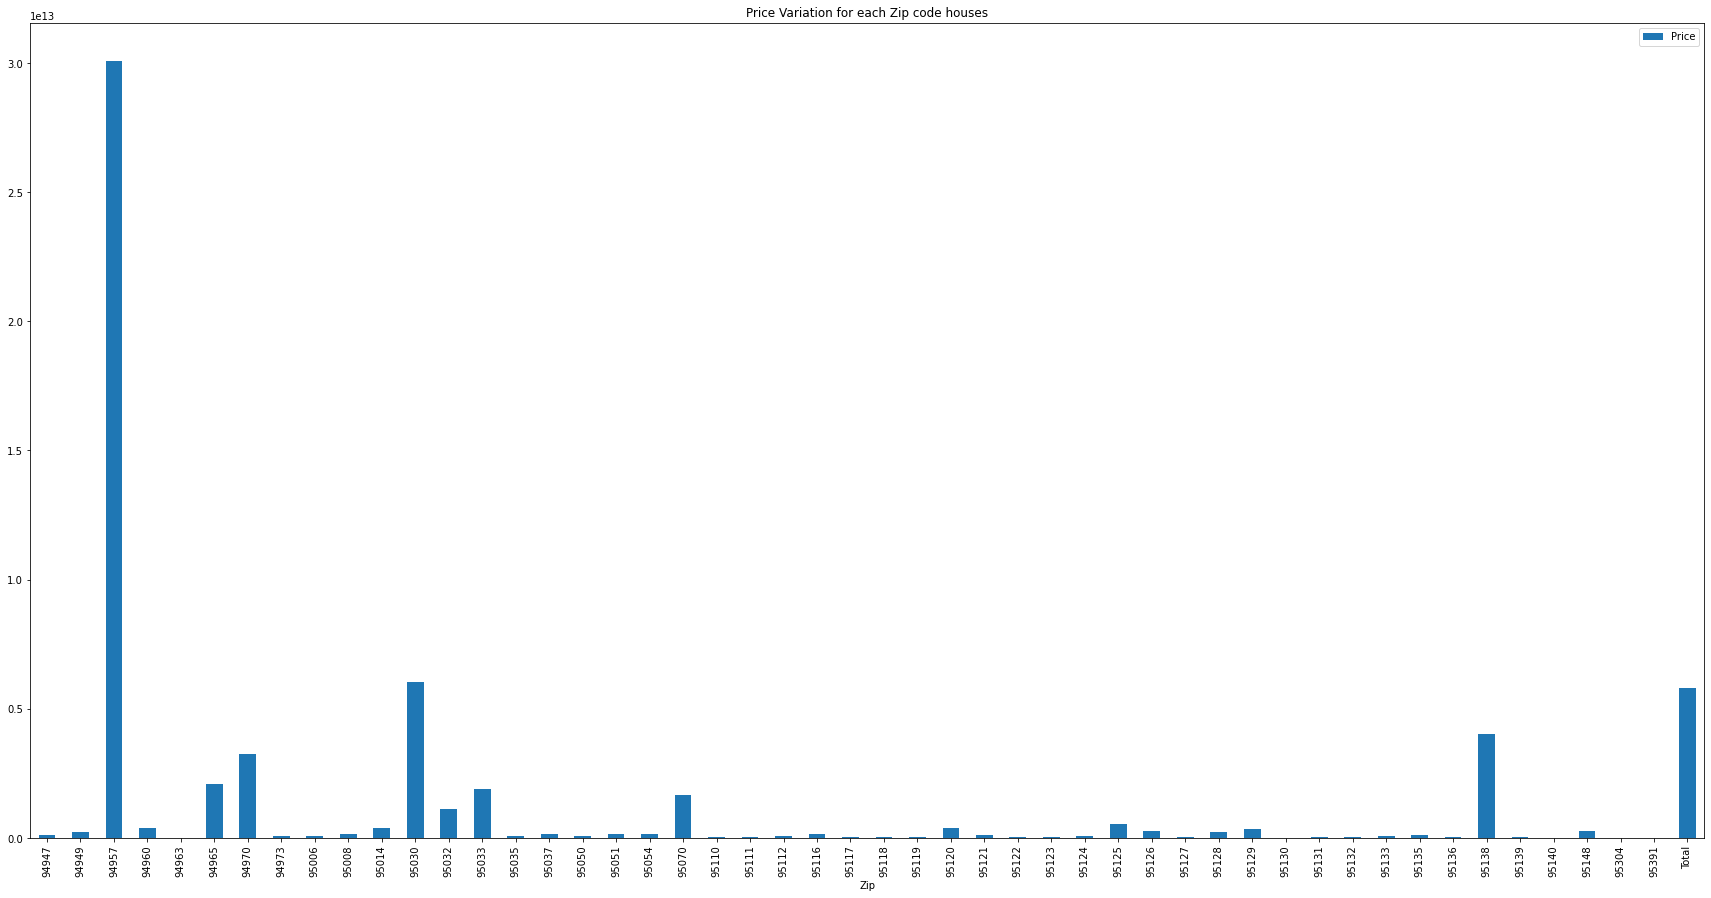

In [ ]:
# Check with 100 data
df_zip[-50:].plot.bar(x = 'Zip', 
                       y = 'Price', 
                       rot = 90, 
                       title = 'Price Variation for each Zip code houses', 
                       figsize = (30, 15)
                       )

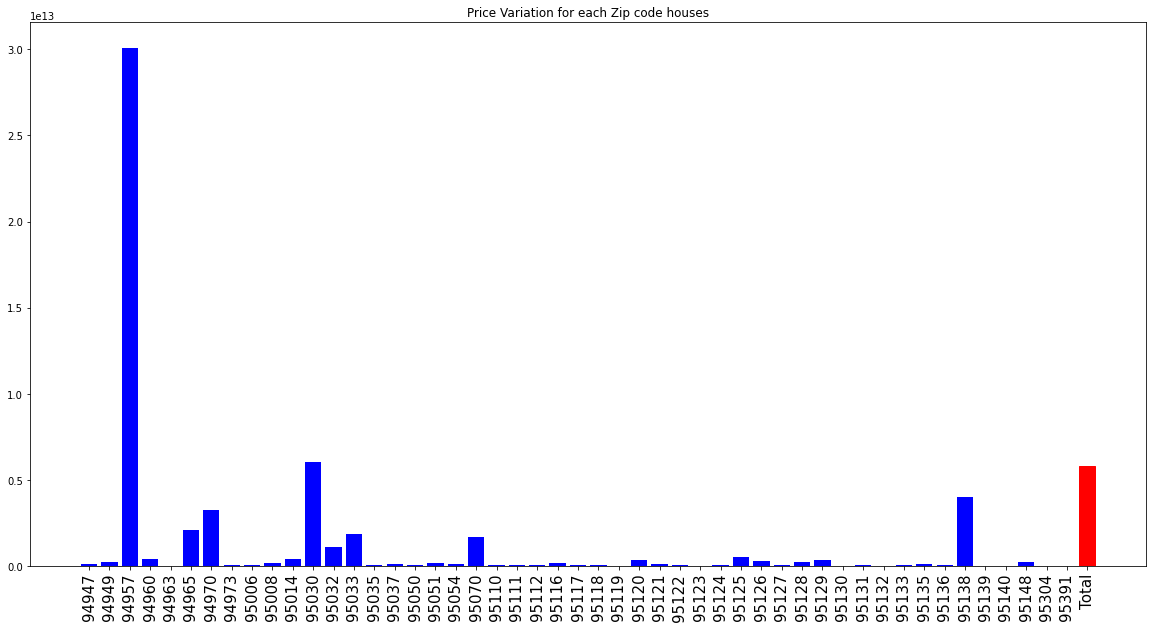

In [ ]:
#data
# x = temp.astype('int')
x = [i for i in range(0,50)]
h = df_zip[-50:].Price.astype('int')
c = ["blue" for i in range(1,49)] + ['red']

plt.rcParams["figure.figsize"] = (20,10)

ax = plt.axes()

#bar plot
plt_bar = plt.bar(x, height = h, color = c)
plt_bar[-1].set_color('red')
ax.set_xticks(x)
ax.set_xticklabels(df_zip[-50:].Zip.unique(), rotation='vertical', fontsize=15)
plt.title("Price Variation for each Zip code houses")
plt.show()


most of the cases, Total variance is higher than zipcode variation.

## 4.Checking Bouncing data
----

Let's check bouncing data of numerical data.

In [ ]:
# delete later
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip           7145 non-null   int64  
 1   Price         7145 non-null   int64  
 2   Beds          7145 non-null   int64  
 3   Baths         7145 non-null   float64
 4   Home size     7063 non-null   float64
 5   Lot size      6880 non-null   float64
 6   Latitude      7145 non-null   float64
 7   Longitude     7145 non-null   float64
 8   SF time       7145 non-null   int64  
 9   PA time       7145 non-null   int64  
 10  School score  7085 non-null   float64
 11  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 670.0 KB


In [ ]:
len(num_df.columns)

12

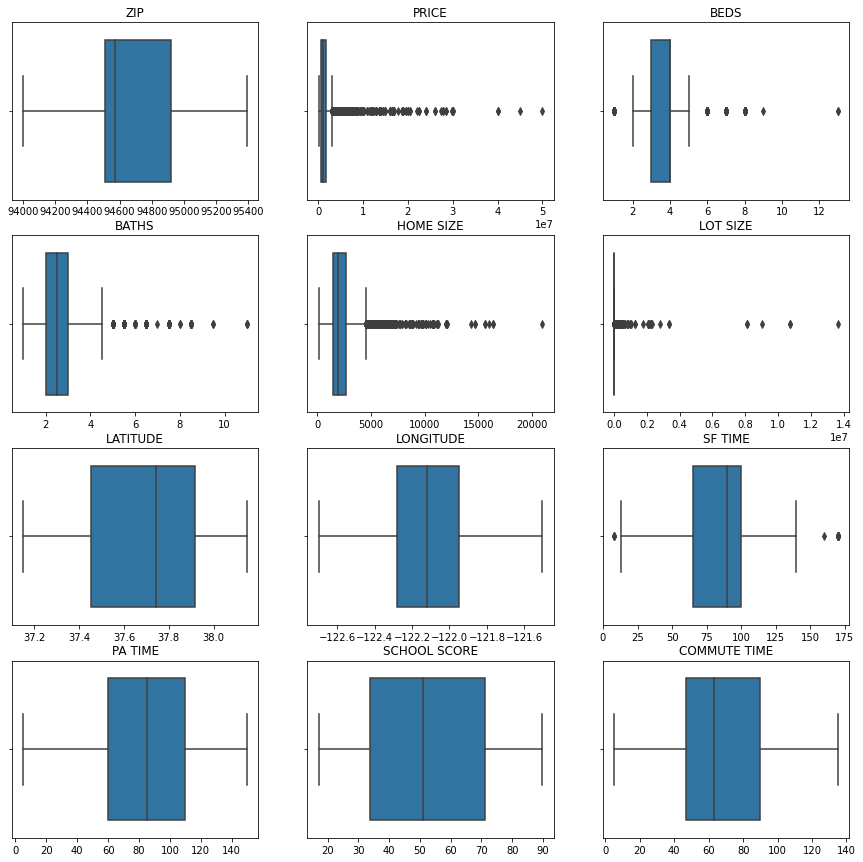

In [ ]:
def graph(column: str) -> None :
    sns.boxplot(x= column, data=df, ax = ax)

plt.figure(figsize=(15,15))
      
# Adding the subplot at the specified
# grid position
for n, column in enumerate(num_df.columns):
  # add a new subplot iteratively
  ax = plt.subplot(4, 3, n + 1)

  # filter df and plot ticker on the new subplot axis
  graph(column)

  # chart formatting
  ax.set_title(column.upper())
  # ax.get_legend().remove()
  ax.set_xlabel("")
    
plt.show()



## 5.Draw Heatmap of numerical data
---

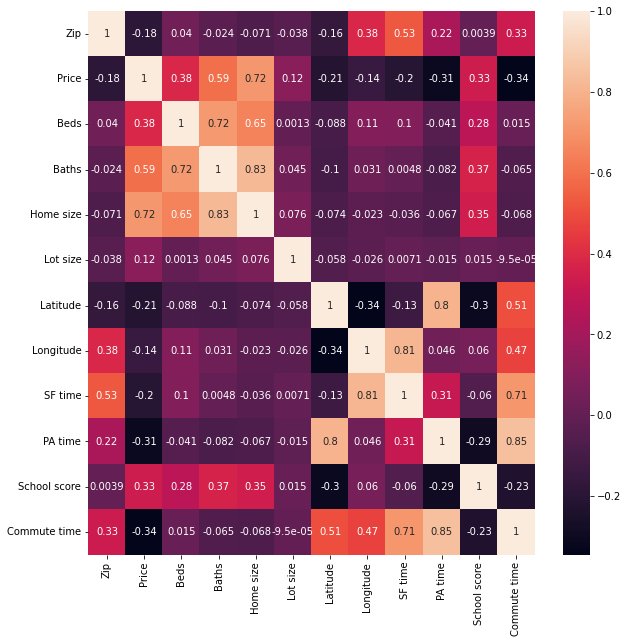

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df.corr(method='pearson'),annot = True, ax=ax)

plt.show()

We can check `Home size` and `Baths`, `Beds` have quite high correlation with `Price` while `Longitude` and `Lot Size`, `Latitude` are not.

# Prepare Training & Test data sets
---

## Train test split
---

In [ ]:
# trian, test datatset
X = df.drop(columns = 'Price')
y = df['Price']

# shape
X.shape, y.shape

((7145, 14), (7145,))

In [ ]:
# Your code here . . .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5716, 14), (1429, 14), (5716,), (1429,))

### Delete Outlier
----

In [ ]:
num_df = X_train.select_dtypes(include=numerics).drop(columns = 'Zip').reset_index(drop=True)
df_outlier = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

# IQR
for i in num_df.columns:
  Q1 = np.percentile(df_outlier[i], 25,
                  interpolation = 'midpoint')
    
  Q3 = np.percentile(df_outlier[i], 75,
                  interpolation = 'midpoint')
  IQR = Q3 - Q1
    
  # print("Old Shape: ", df_outlier.shape)
    
  # Upper bound
  upper = np.where(df_outlier[i] >= (Q3+1.5*IQR))
    
  # Lower bound
  lower = np.where(df_outlier[i] <= (Q1-1.5*IQR))
    
  # Removing the Outliers
  df_outlier.drop(upper[0], inplace = True)
  df_outlier.drop(lower[0], inplace = True)
  df_outlier = df_outlier.reset_index(drop = True)
  print(f"Column Name: {i}")
  print(f"DELETED: {len(upper[0])} Upper Outliers and {len(lower[0])} Lower Outliers ")
  print("New Shape: ", df_outlier.shape)
  # print(f"DELETED INDEX: {upper[0], lower[0]}")
  print("=============================================")


Column Name: Beds
DELETED: 198 Upper Outliers and 46 Lower Outliers 
New Shape:  (5472, 15)
Column Name: Baths
DELETED: 338 Upper Outliers and 0 Lower Outliers 
New Shape:  (5134, 15)
Column Name: Home size
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5134, 15)
Column Name: Lot size
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5134, 15)
Column Name: Latitude
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5134, 15)
Column Name: Longitude
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5134, 15)
Column Name: SF time
DELETED: 9 Upper Outliers and 3 Lower Outliers 
New Shape:  (5122, 15)
Column Name: PA time
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5122, 15)
Column Name: School score
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5122, 15)
Column Name: Commute time
DELETED: 0 Upper Outliers and 0 Lower Outliers 
New Shape:  (5122, 15)


In [ ]:
X_train_outlier, y_train_outlier = df_outlier.iloc[:, :-1], df_outlier.iloc[:, -1]
X_train_outlier.shape, y_train_outlier.shape

((5122, 14), (5122,))

# Pre-processing data
---

## Pipeline
---

In [ ]:
## num + cat
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Sequentially apply a list of transforms and a final estimator. 
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array.
# from sklearn.preprocessing import OrdinalEncoder # Encode categorical features as an integer array.
# (sklearn 0.20 version) 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리함 + 판다드 DataFrame과도 잘 동작함
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # 표준화 scaler
from sklearn.preprocessing import MinMaxScaler

# split columns
numerics = ['int16' ,'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics).drop(columns = ['Price', 'Zip'] )
cat_df = df[['City', 'Zip']]
cat_df.Zip = df.Zip.astype(str)

# make pipelines for each numerical and categorical data
num_pipeline = Pipeline([ # list of tuples that are chained, with the last object an estimator
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()), #standard -> minmax로 바꿔보기
    ])

cat_pipeline = Pipeline([ # list of tuples that are chained, with the last object an estimator
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])


# get attributes
num_attribs = list(num_df)
cat_attribs = list(cat_df)

# make full pipeline
full_pipeline1 = ColumnTransformer([      ## num, cat 나눠서 처리하는 이유
        ("num", num_pipeline, num_attribs), # 밀집 행렬을 반환
        ("cat", cat_pipeline, cat_attribs), # 희소 행렬을 반환
    ])

## outlier
full_pipeline2 = ColumnTransformer([      ## num, cat 나눠서 처리하는 이유
        ("num", num_pipeline, num_attribs), # 밀집 행렬을 반환
        ("cat", cat_pipeline, cat_attribs), # 희소 행렬을 반환
    ])

# fit transform it
X_train_transformed = full_pipeline1.fit_transform(X_train)
X_test_transformed = full_pipeline1.transform(X_test)
## fit transform outliter data
X_train_outlier_transformed = full_pipeline2.fit_transform(X_train_outlier)
X_test_outlier_transformed = full_pipeline2.transform(X_test)

In [ ]:
X_train_transformed.shape, X_test_transformed.shape, X_train_outlier_transformed.shape, X_test_outlier_transformed.shape

((5716, 341), (1429, 341), (5122, 332), (1429, 332))

## Lazy Predict
---

In [ ]:
X_train, X_test = X_train_transformed.toarray(), X_test_transformed.toarray()
X_train_outlier, X_test_outlier = X_train_outlier_transformed.toarray(), X_test_outlier_transformed.toarray()

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train[:1000], X_test[1000:1200], y_train[:1000], y_test[1000:1200])

 95%|█████████▌| 40/42 [01:12<00:02,  1.29s/it]

[19:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:14<00:00,  1.78s/it]


In [ ]:
print(models)

                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          79579492985077735620525822091018021243701655745...   
RANSACRegressor                                   148698391827387745164066816.00   
TransformedTargetRegressor                         28368753405405738360111104.00   
LinearRegression                                   28368753405405738360111104.00   
SGDRegressor                                                               45.52   
LinearSVR                                                                   3.15   
MLPRegressor                                                                3.15   
SVR                                                                         2.52   
QuantileRegressor                                                           2.52   
NuSVR                                                                       

# Select ML Models, perform 10-fold Cross Validation 
---

## Functions
---

We made some functions which calculates cross_validation score and train, predict a model.

In [ ]:
# show cross validation score
def display_scores(scores):
    '''
    prints cross-validation scores
    '''
    print("Cross Validation Scores:", scores)
    print("Cross val scores Mean:", scores.mean())
    print("Cross val scores Standard deviation:", scores.std())
    return scores.mean()

In [ ]:
def fit_score(model, outlier = False):
  '''
  - train model with Kfold Cross-Validation score.
  '''
  if outlier == False: # if outlier parameter is False
    # Train model Classifer
    model.fit(X_train, y_train)

    # pred
    y_pred_xgbr = model.predict(X_train)

    # Kfold
    kfold = KFold(n_splits=10, shuffle=True)
    xgbr_scores = cross_val_score(model, X_train, y_train, cv=kfold , scoring = 'neg_root_mean_squared_error') # -rmse
    display_scores(xgbr_scores)
    return model
  else:
    model.fit(X_train_outlier, y_train_outlier)

    # pred
    y_pred_xgbr = model.predict(X_train_outlier)

    # Kfold
    kfold = KFold(n_splits=10, shuffle=True)
    xgbr_scores = cross_val_score(model, X_train_outlier, y_train_outlier, cv=kfold, scoring = 'neg_root_mean_squared_error') #rmse
    
    '''
    This is negative mean square error.\nIf this score indicate error
    The larger the mse value, the larger the error, so - is added to train in the direction of maximizing it. 
    The higher the value, the better the model.
    '''
    display_scores(xgbr_scores)
    return model

In [ ]:

def predict_show(model, outlier = False):
  '''
  - Predict test dataset and Plot line
  - Prints out MSE and RMSE
  - Scatter plot shows y_test(label) with red color,
  - Line plot show y_pred(predictoin) with green color
  '''
  if outlier == False:
    # predict with test data and plot
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % (mse**(1/2.0)))
    print("R square: %.2f" % (r2))


    x_ax = range(len(y_test))

    fig = plt.figure(figsize=(20, 10))
    ax=sns.scatterplot(x=x_ax, y=y_test, s=20, color='red')
    ax=sns.lineplot(x=x_ax, y=y_pred, color='green')

    fig.suptitle(f'Prediction and Label of {model} ')
    plt.xlabel('X_test')
    plt.ylabel('Price')
    plt.legend(labels = ['Predict', 'Label'], fontsize = 17,fancybox=True)
    plt.show()
  else:
    # predict with test data and plot
    y_pred_outlier = model.predict(X_test_outlier)
    mse = mean_squared_error(y_test, y_pred_outlier)
    r2 = r2_score(y_test, y_pred_outlier)

    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % (mse**(1/2.0)))
    print("R square: %.2f" % (r2))


    x_ax = range(len(y_test))

    fig = plt.figure(figsize=(20, 10))
    ax=sns.scatterplot(x=x_ax, y=y_test, s=20, color='red')
    ax=sns.lineplot(x=x_ax, y=y_pred_outlier, color='green')

    fig.suptitle(f'Prediction and Label of {model} After Deleting Outliers')
    plt.xlabel('X_test_outlier')
    plt.ylabel('Price')
    plt.legend(labels = ['Predict', 'Label'], fontsize = 17,fancybox=True)
    plt.show()

In [ ]:
def train_predict(model, outlier = False):
  fit_score(model, outlier)
  predict_show(model, outlier)
  return model

## XGBRegressor
---

In [ ]:
import xgboost as xgb
# Create xgbr classifer object
xgbr = xgb.XGBRegressor(objective ='reg:squarederror') 
fit_score(xgbr)

Cross Validation Scores: [-1267849.25193235 -1227527.35503823  -947400.44133755  -848849.66222207
  -905685.1920246   -730866.39216786 -1392929.28484245  -883083.51980702
  -970885.34166327  -810061.2635022 ]
Cross val scores Mean: -998513.7704537589
Cross val scores Standard deviation: 208666.8213920868


XGBRegressor(objective='reg:squarederror')

Cross Validation Scores: [ -864709.52012061  -776758.7282017   -788739.12474287  -888418.09938595
  -791174.41089254  -825414.32670041 -1491352.51240114 -1249308.15454067
 -1448547.84696757 -1237597.61752839]
Cross val scores Mean: -1036202.0341481849
Cross val scores Standard deviation: 273392.3764116069
MSE: 1479722542137.59
RMSE: 1216438.47
R square: 0.77


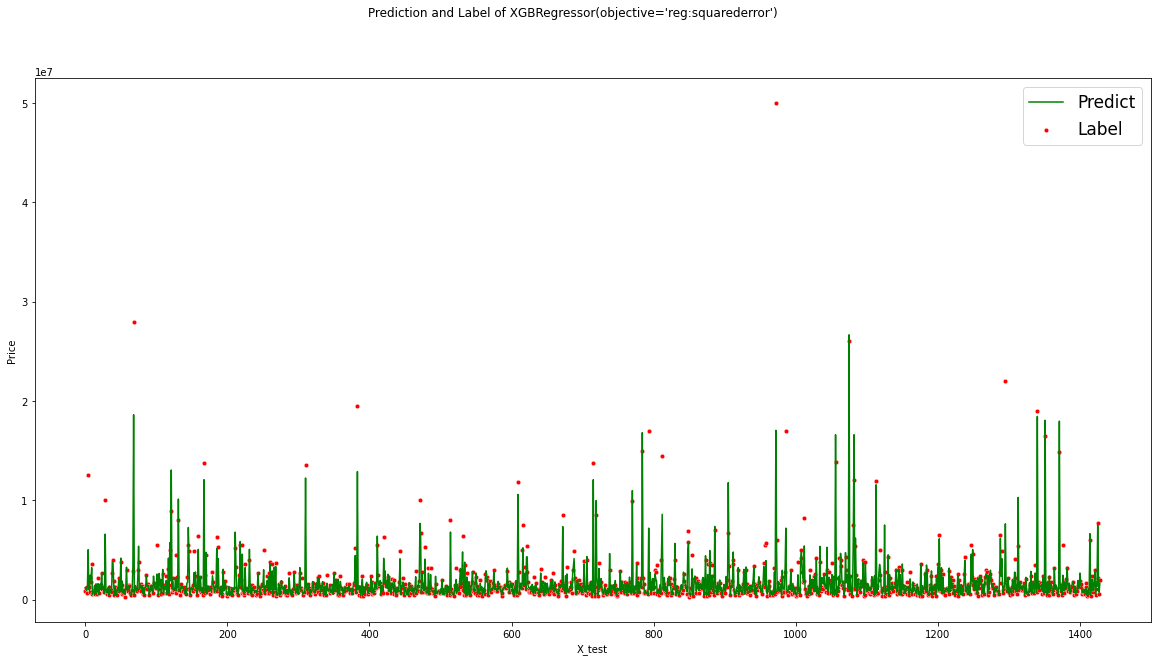

XGBRegressor(objective='reg:squarederror')

In [ ]:
train_predict(xgbr)

MSE: 1479722542137.59
RMSE: 1216438.47
R square: 0.77


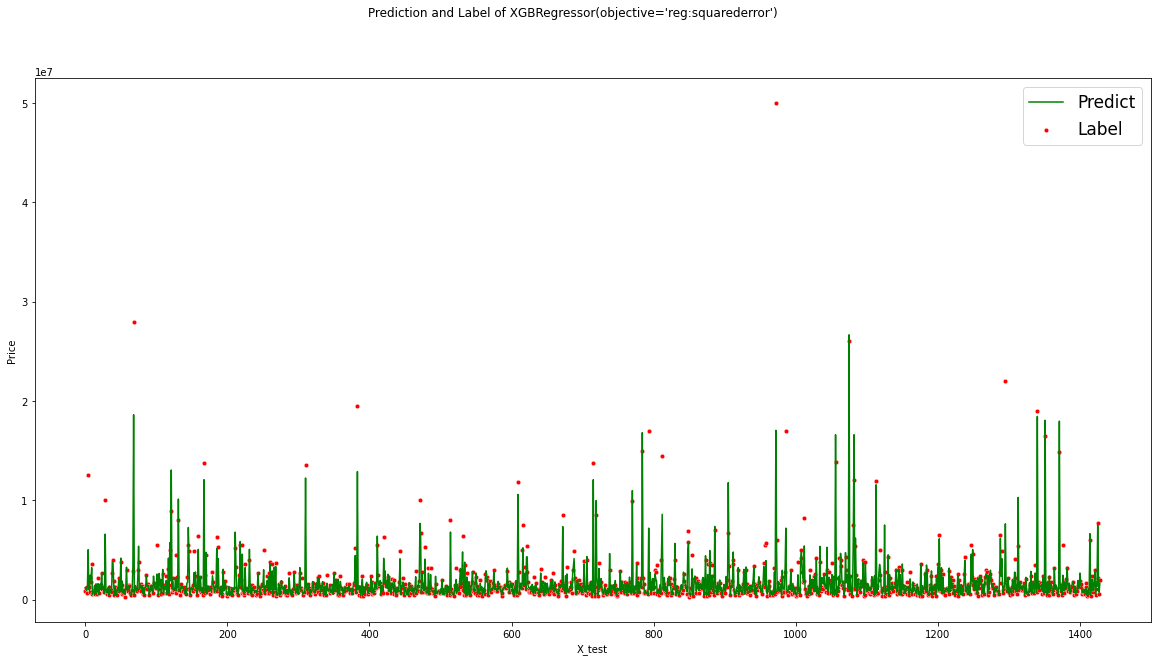

In [ ]:
predict_show(xgbr)

In [ ]:
# MSE: 1479722542137.59
# RMSE: 1216438.47
# R square: 0.77

In [ ]:
xgbr_outlier = xgb.XGBRegressor(objective ='reg:squarederror') 
fit_score(xgbr_outlier, True) #train with data that delete the outlier

Cross Validation Scores: [-496654.6917372  -585980.67790087 -326241.37432985 -392132.52270559
 -604676.58582831 -462624.66348611 -348151.43745803 -414443.39481585
 -642894.84161934 -347077.89100813]
Cross val scores Mean: -462087.8080889266
Cross val scores Standard deviation: 110178.99390270292


XGBRegressor(objective='reg:squarederror')

In [ ]:
predict_show(xgbr_outlier, True)

MSE: 3055339154673.81
RMSE: 1747952.85
R square: 0.52


In [ ]:
# MSE: 3055339154673.81
# RMSE: 1747952.85
# R square: 0.52

## BaggingRegressor
----

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(random_state=42)

Cross Validation Scores: [-1081386.00234137 -1822209.15219682  -885887.67884137  -972655.85328589
  -898384.6295764   -582724.57442184  -670735.59757111 -1027139.9780238
 -1013569.3543493   -696087.54647153]
Cross val scores Mean: -965078.0367079421
Cross val scores Standard deviation: 327164.86005227314
MSE: 1095594500999.92
RMSE: 1046706.50
R square: 0.83


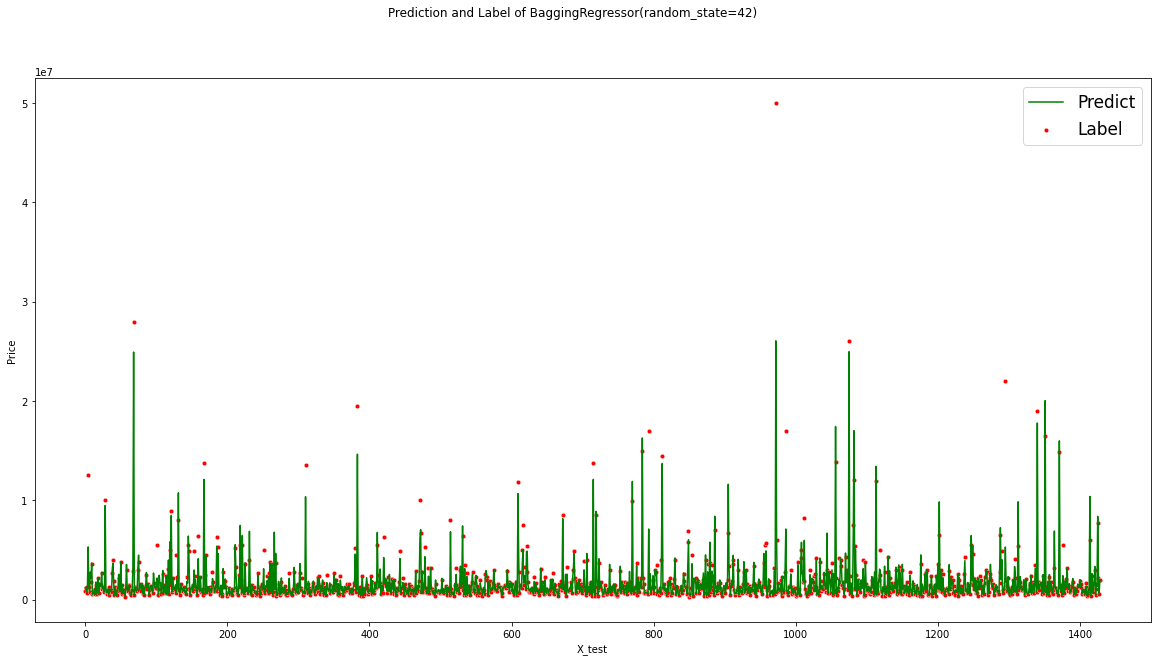

BaggingRegressor(random_state=42)

In [ ]:
train_predict(bag_regressor)

In [ ]:
# Scores: [-1247684.49514261 -1066205.3619468   -742197.38700042  -699514.35046273
#   -935401.92891082 -1101425.56776558  -833551.68750302 -1065781.3505977
#   -856411.53179142 -1422706.29709176]
# Mean: -997087.9958212854
# Standard deviation: 216377.059656635
# MSE: 1095594500999.92
# RMSE: 1046706.50
# R square: 0.83

Cross Validation Scores: [-343876.9911377  -343758.79031747 -440614.9306327  -587889.97617504
 -411207.27712986 -527585.08491617 -311998.41009311 -350143.12150075
 -458087.07648615 -415640.19998611]
Cross val scores Mean: -419080.1858375075
Cross val scores Standard deviation: 83592.35373860666
MSE: 3093993481130.27
RMSE: 1758975.12
R square: 0.52


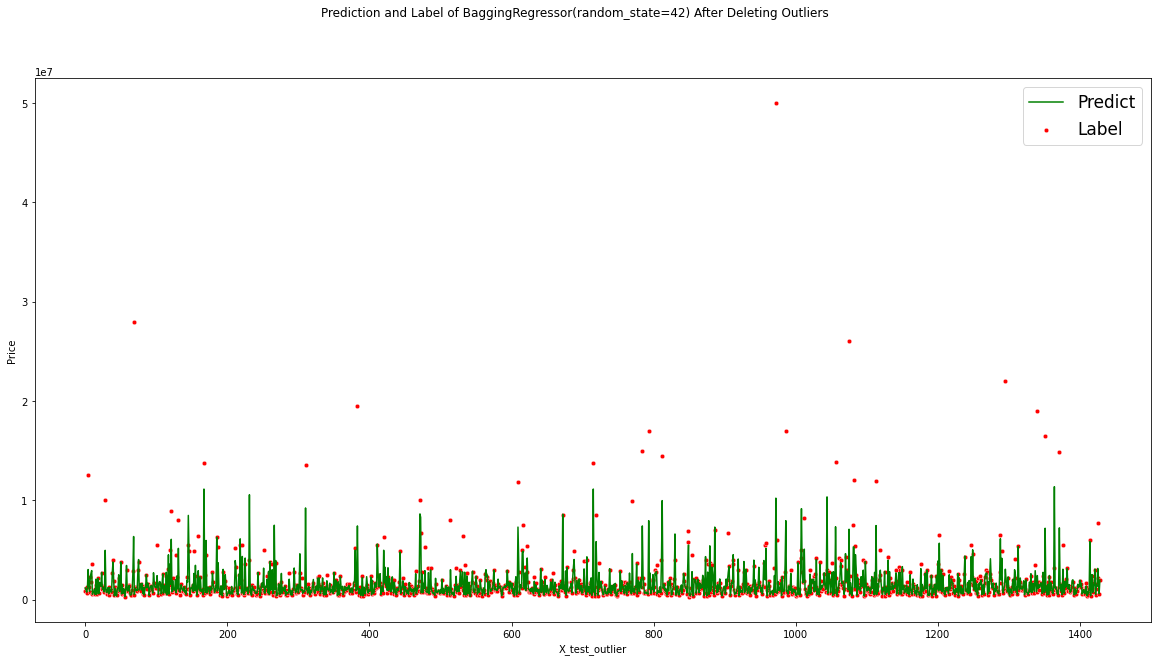

BaggingRegressor(random_state=42)

In [ ]:
bag_regressor_outlier = BaggingRegressor(random_state=42)

train_predict(bag_regressor_outlier, True)

In [ ]:
# Cross Validation Scores: [-520850.56217805 -381753.05640981 -364545.49517169 -369301.22584243
#  -369941.15704419 -892844.56211529 -387187.77505903 -366372.50673003
#  -365958.87296613 -491893.4246023 ]
# Cross val scores Mean: -451064.863811896
# Cross val scores Standard deviation: 156766.86527712058
# MSE: 3093993481130.27
# RMSE: 1758975.12
# R square: 0.52

## GradientBoostingRegressor
---

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)

Cross Validation Scores: [ -718006.28305166  -719599.7329872   -633436.37345439 -1599079.81923062
 -1630303.35056733  -944897.18810489  -710136.9171129  -1313112.55722009
  -881321.19052421 -1371472.64282617]
Cross val scores Mean: -1052136.605507945
Cross val scores Standard deviation: 368603.2189262145
MSE: 1369623034395.87
RMSE: 1170308.95
R square: 0.79


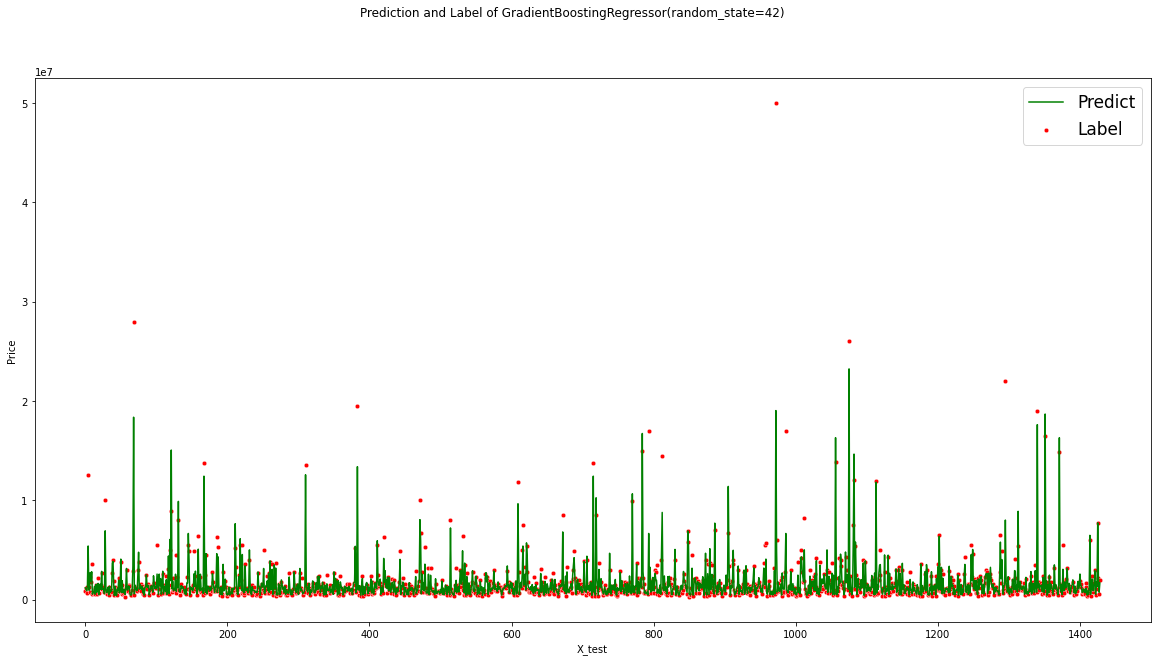

GradientBoostingRegressor(random_state=42)

In [ ]:
train_predict(gb_reg)

In [ ]:
# Cross Validation Scores: [ -933407.39590864 -1179969.32658291  -857594.06203307  -742570.5991052
#   -586467.4826869  -1047588.00793806 -1369888.67250232  -792248.90992055
#  -1657756.06785338  -673761.29439154]
# Cross val scores Mean: -984125.1818922578
# Cross val scores Standard deviation: 318304.79531868454
# MSE: 1369623034395.87
# RMSE: 1170308.95
# R square: 0.79

Cross Validation Scores: [-380136.22507256 -492064.41827668 -593254.13366677 -331035.26409573
 -388397.28857612 -411587.705047   -439988.64293818 -343001.10310664
 -582691.52462473 -328640.89525907]
Cross val scores Mean: -429079.7200663479
Cross val scores Standard deviation: 92791.48618496027
MSE: 2966594143621.28
RMSE: 1722380.37
R square: 0.54


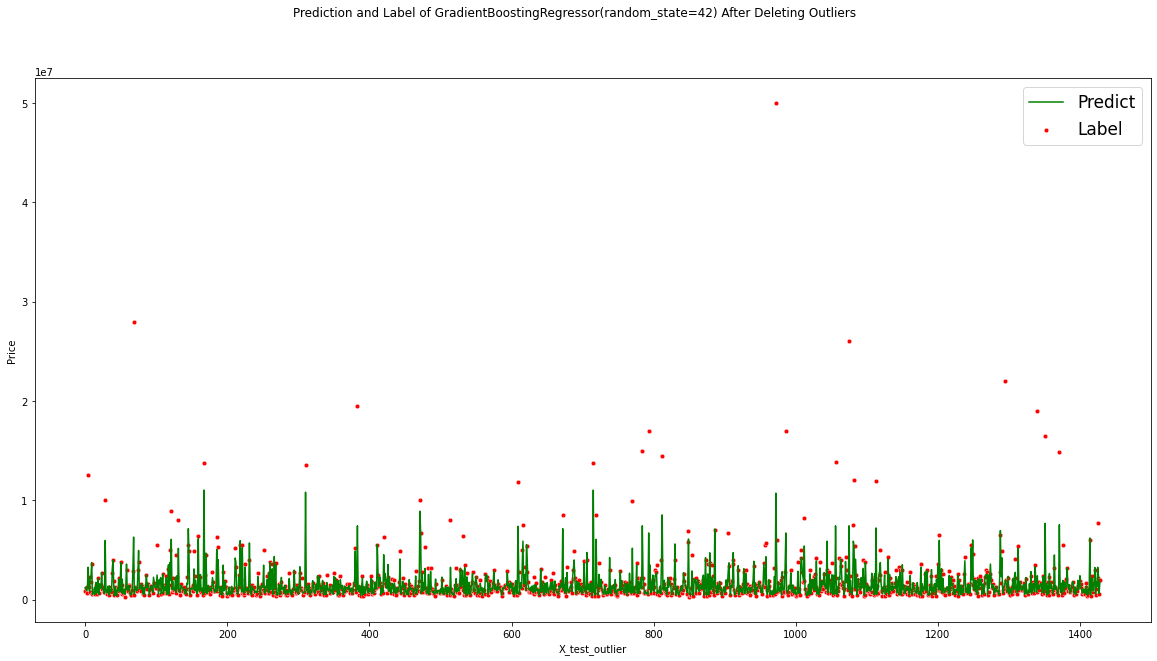

GradientBoostingRegressor(random_state=42)

In [ ]:
gb_reg_outlier = GradientBoostingRegressor(random_state=42)
train_predict(gb_reg_outlier, outlier=True)

In [ ]:
# Cross Validation Scores: [-558550.18784051 -436581.0759963  -516633.88129614 -417862.78164401
#  -421113.68311432 -390045.1198484  -312175.14875451 -601958.83184259
#  -349672.63129559 -340509.51682997]
# Cross val scores Mean: -434510.2858462328
# Cross val scores Standard deviation: 91436.70120099408
# MSE: 2966594143621.28
# RMSE: 1722380.37
# R square: 0.54

## RandomForestRegressor
----

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

Cross Validation Scores: [ -915854.11872076  -653473.34507718  -626929.75042815 -1098920.18704354
 -1458372.15551904  -637661.59231042  -915310.79238101  -629773.24270279
 -1129445.69520281 -1071503.81516392]
Cross val scores Mean: -913724.4694549605
Cross val scores Standard deviation: 266307.42510451784
MSE: 1283286072847.42
RMSE: 1132822.17
R square: 0.80


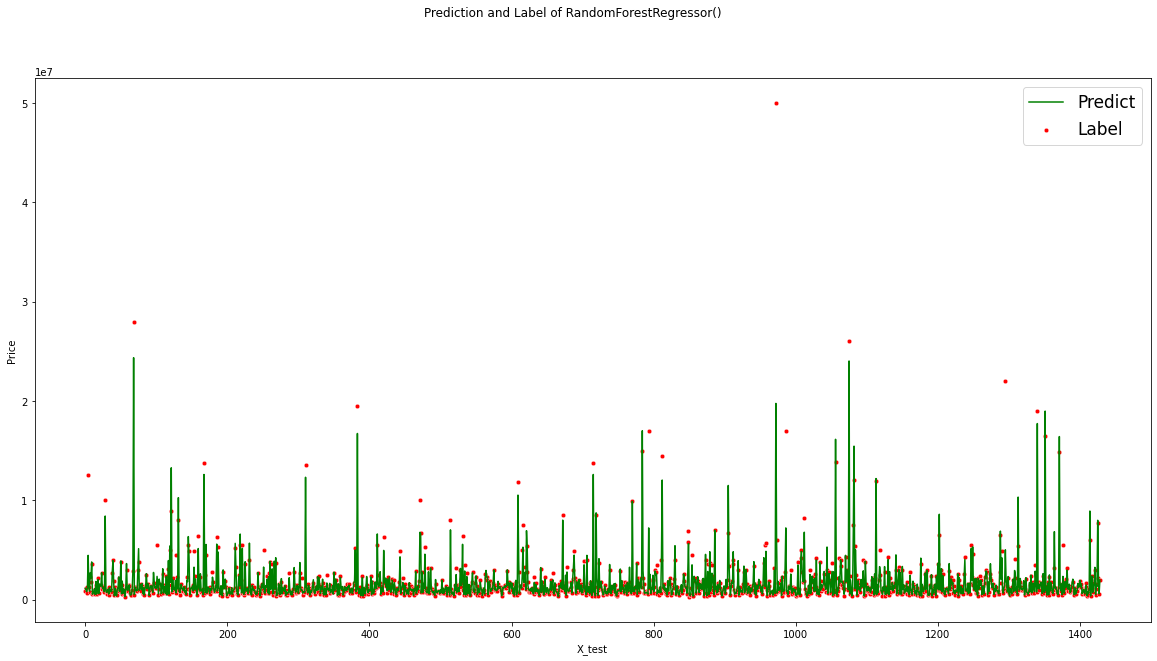

RandomForestRegressor()

In [ ]:
train_predict(rf_regressor)

In [ ]:
# Cross Validation Scores: [-1386386.73166679 -1357637.08974545  -719909.6916854   -923626.60505579
#   -891557.63383564  -732277.538045    -933368.58881629  -988670.67202041
#   -607550.95359899  -884502.42055032]
# Cross val scores Mean: -942548.792502009
# Cross val scores Standard deviation: 241626.812487812
# MSE: 1323706635619.27
# RMSE: 1150524.50
# R square: 0.79

Cross Validation Scores: [-234485.42347468 -411472.53528981 -305993.96667074 -314346.47557516
 -519166.81776102 -379827.36847298 -344390.58590985 -475324.26255374
 -449606.51957613 -653962.17454339]
Cross val scores Mean: -408857.6129827508
Cross val scores Standard deviation: 115432.74727974812
MSE: 3063582404018.10
RMSE: 1750309.23
R square: 0.52


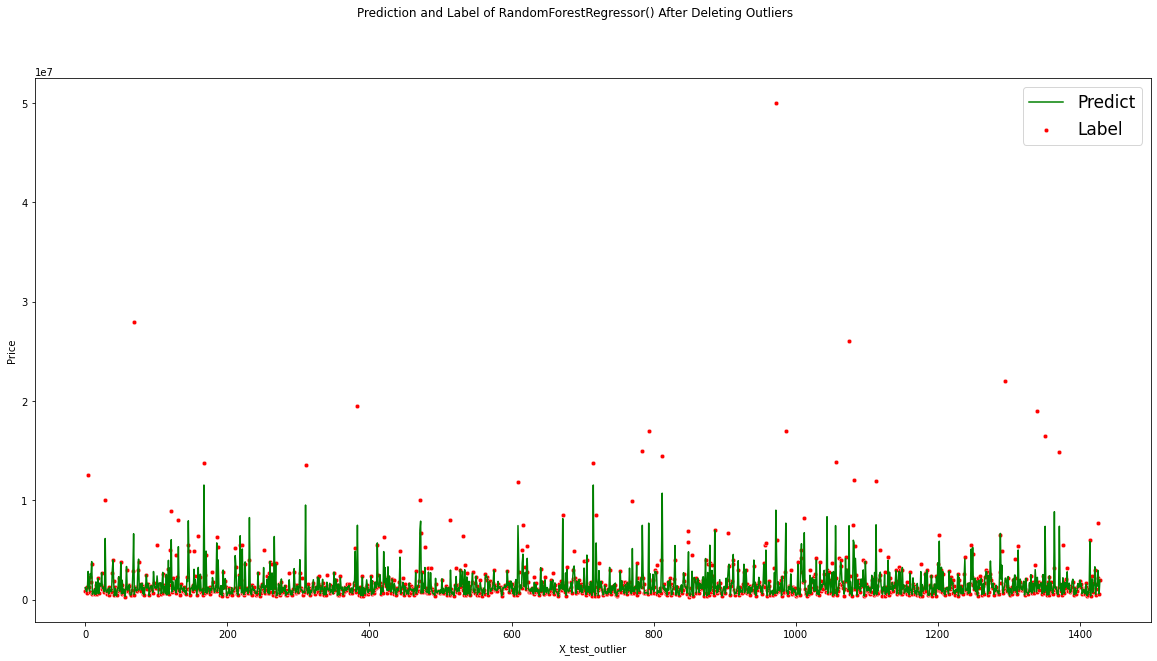

RandomForestRegressor()

In [ ]:
rf_regressor_outlier = RandomForestRegressor()
train_predict(rf_regressor_outlier, True)

In [ ]:
# Cross Validation Scores: [-568557.69190302 -417499.07317027 -381056.89061545 -322281.6825596
#  -320469.49915308 -268997.34858498 -513806.10958281 -252071.93029084
#  -385762.92648489 -494164.81817872]
# Cross val scores Mean: -392466.7970523652
# Cross val scores Standard deviation: 100965.56181579785
# MSE: 3054859787733.23
# RMSE: 1747815.72
# R square: 0.52

## LGBMRegressor
----

In [ ]:
import lightgbm as lgb
gbm_regressor = lgb.LGBMRegressor(random_state = 42)

Cross Validation Scores: [ -927401.49316178  -523044.51718829  -844447.24926698 -1065234.42399161
  -756138.18246155 -1684463.48293989 -1071609.3866942  -1193889.81981638
 -1361519.59856961  -644295.27326717]
Cross val scores Mean: -1007204.3427357463
Cross val scores Standard deviation: 329938.25533929624
MSE: 1617268327129.74
RMSE: 1271718.65
R square: 0.75


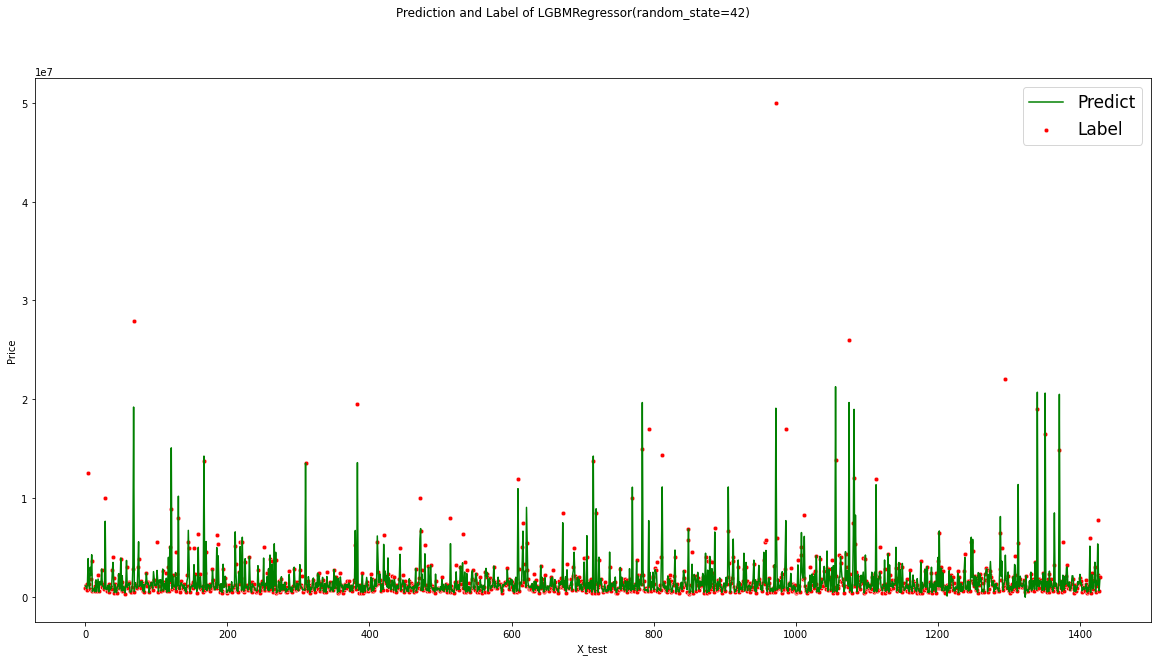

LGBMRegressor(random_state=42)

In [ ]:
train_predict(gbm_regressor)

In [ ]:
# Cross Validation Scores: [ -741240.46056621  -645521.09291584 -1015566.68255846  -724009.26620449
#  -1269095.21300134 -1507453.8255077  -1014445.67692502  -961421.18695723
#  -1141210.52293511 -1031408.87407673]
# Cross val scores Mean: -1005137.2801648118
# Cross val scores Standard deviation: 249260.23255347702
# MSE: 1617268327129.74
# RMSE: 1271718.65
# R square: 0.75

Cross Validation Scores: [-345200.88207297 -363788.44001211 -522719.64739636 -311343.73885056
 -668676.53522819 -578734.90971704 -386530.89817436 -558926.96440843
 -342878.11353068 -320452.36320945]
Cross val scores Mean: -439925.2492600155
Cross val scores Standard deviation: 122660.99270032987
MSE: 3225186731515.63
RMSE: 1795880.49
R square: 0.50


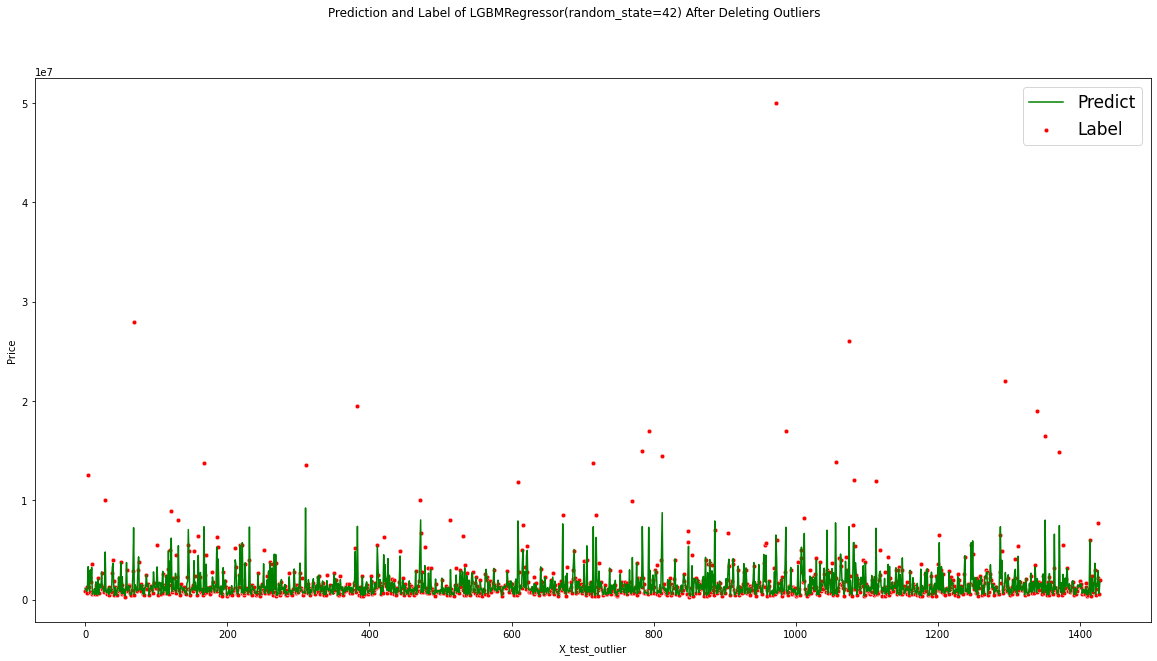

LGBMRegressor(random_state=42)

In [ ]:
gbm_regressor_outlier = lgb.LGBMRegressor(random_state = 42)

train_predict(gbm_regressor_outlier, True)

In [ ]:
# Cross Validation Scores: [-609616.18840893 -431914.05827757 -394011.22048382 -406772.44810071
#  -550970.30831355 -278090.79023208 -330323.27731208 -535605.59062123
#  -361163.89578748 -501095.27853043]
# Cross val scores Mean: -439956.30560678896
# Cross val scores Standard deviation: 100846.53249225381
# MSE: 3225186731515.63
# RMSE: 1795880.49
# R square: 0.50

## Result of experiment

- cross val with train / MSE, RMSE, R2  with test data

- using original data, not a data without outlier

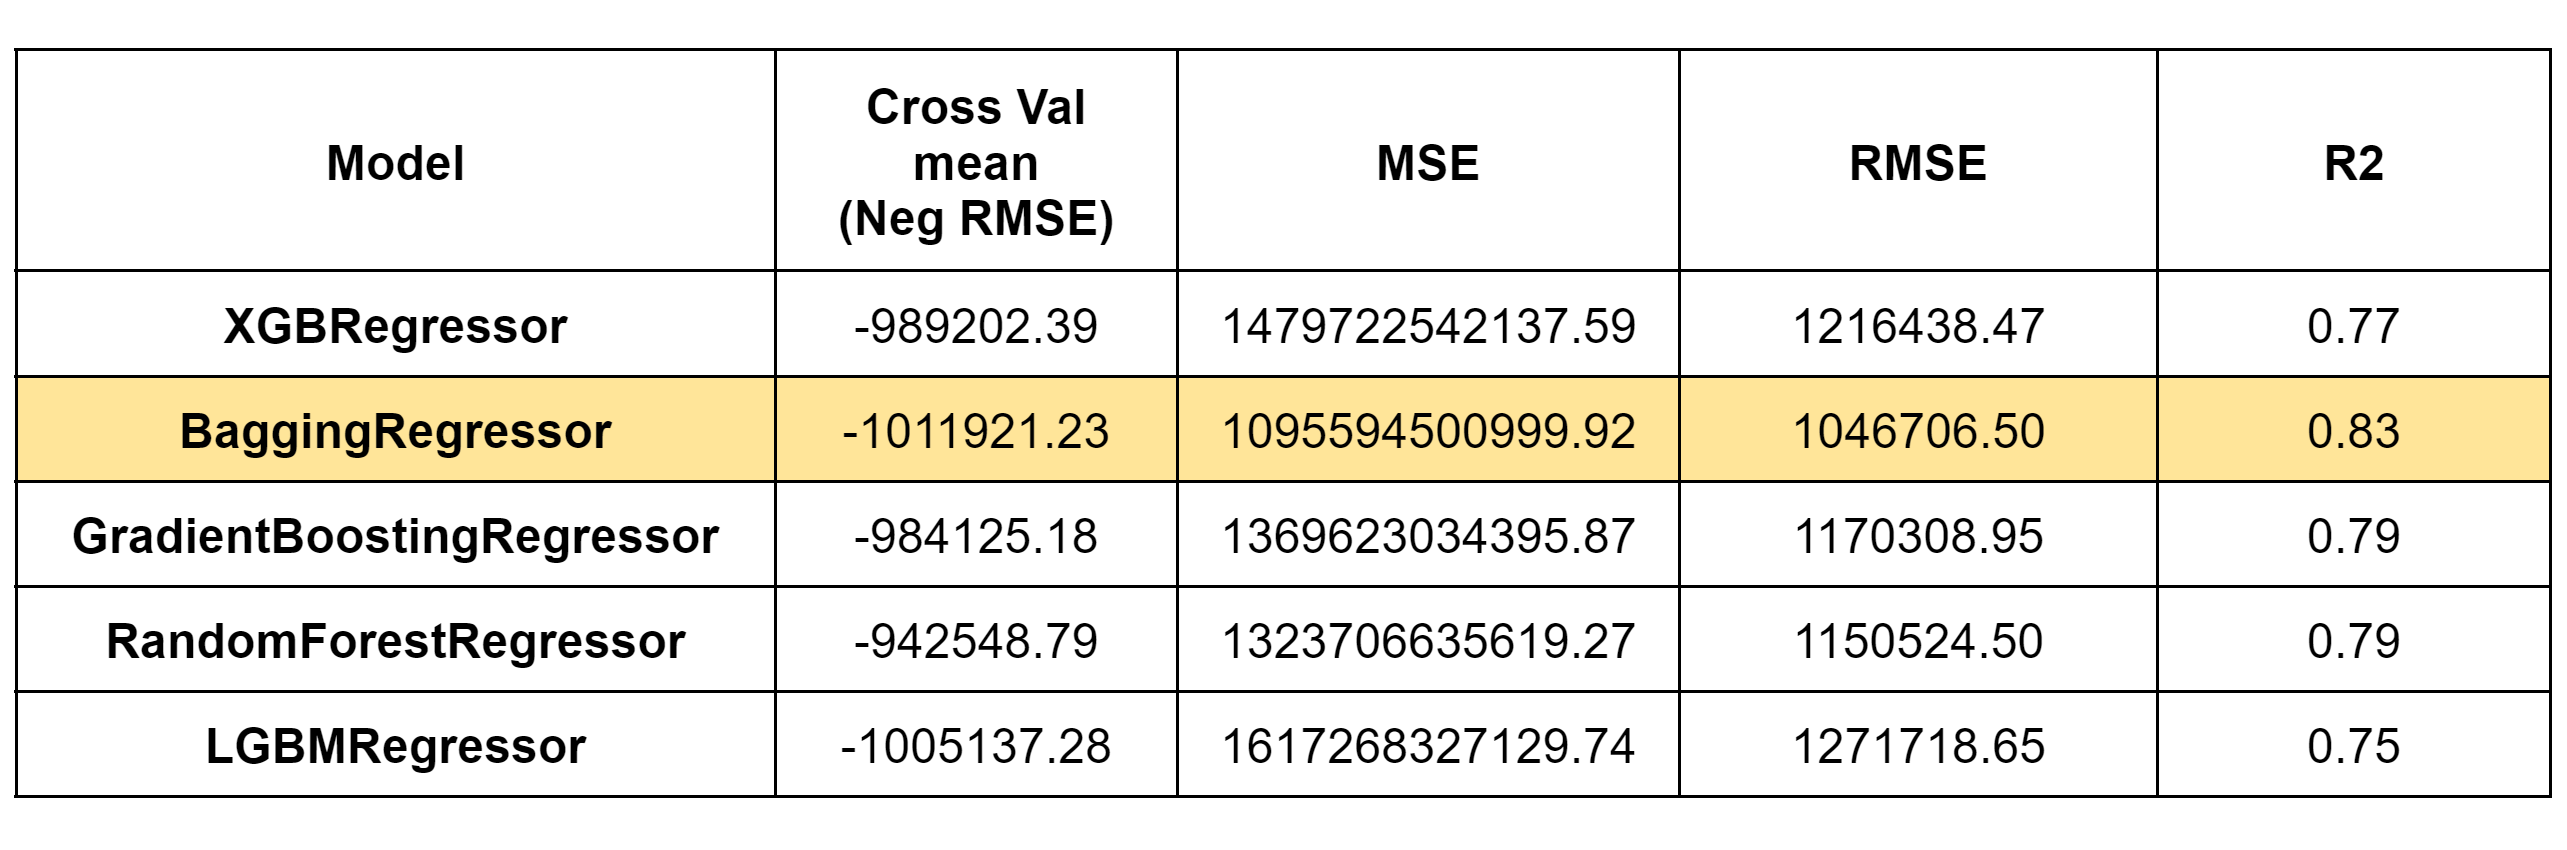



# Pick the best model from Part 1 and perform fine-tuning
---

The Bagging regressor with original data showed a highest perfomance in every metrics.

Let's tune the parameter with Gridsearch

Parmeter that tuned:

- base_estimator : The base estimator to fit on random subsets of the dataset. Default estimator is a DecisionTreeRegressor.
- n_estimatiors : The number of base estimators in the ensemble.
- max_samples : The number of samples to draw from X to train each base estimator 
- max_features : The number of features to draw from X to train each base estimator


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR

params = {
        'base_estimator' : [DecisionTreeRegressor(), 
                            # SVR(random_state=42), 
                            ExtraTreeRegressor(),
                            # MLPRegressor(random_state=42),
                            # KNeighborsRegressor(),
                            # RandomForestRegressor()
                            ],
        'n_estimators' : [5, 10, 15, 20],
        'max_samples' : [0.5, 0.7, 1.0],
        'max_features' : [0.5, 0.7, 1.0]

        }

grid_search = GridSearchCV(BaggingRegressor(random_state=42), params, verbose=1, cv=10, n_jobs = -1, scoring = 'neg_root_mean_squared_error')
# grid_search = GridSearchCV(BaggingRegressor(random_state=42), params, verbose=1, cv=10, n_jobs = -1, scoring = 'r2')


grid_search_history = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
grid_search.best_params_

{'base_estimator': ExtraTreeRegressor(),
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 15}

In [ ]:
rst_df = pd.DataFrame(grid_search.cv_results_)[['param_base_estimator', 'param_n_estimators', 'param_max_features', 'param_max_samples', 'mean_test_score', 'rank_test_score']].sort_values(by = 'rank_test_score').reset_index()
rst_df.head()

index     param_base_estimator param_n_estimators param_max_features  \
0     58     ExtraTreeRegressor()                 15               0.70   
1     59     ExtraTreeRegressor()                 20               0.70   
2     69     ExtraTreeRegressor()                 10               1.00   
3     35  DecisionTreeRegressor()                 20               1.00   
4     66     ExtraTreeRegressor()                 15               1.00   

  param_max_samples  mean_test_score  rank_test_score  
0              1.00       -979044.34                1  
1              1.00       -979510.49                2  
2              1.00       -982549.27                3  
3              1.00       -986447.34                4  
4              0.70       -987213.84                5

# Test ML model with the test set
----

Cross Validation Scores: [ -745519.17794572  -731783.74133253  -889179.00603667 -1177518.59855702
 -1799931.84830772  -770489.5743956   -714177.08182727  -589360.43144994
 -1089481.59537278  -927273.15512633]
Cross val scores Mean: -943471.421035159
Cross val scores Standard deviation: 332373.5152552674
MSE: 1508485843185.35
RMSE: 1228204.32
R square: 0.76


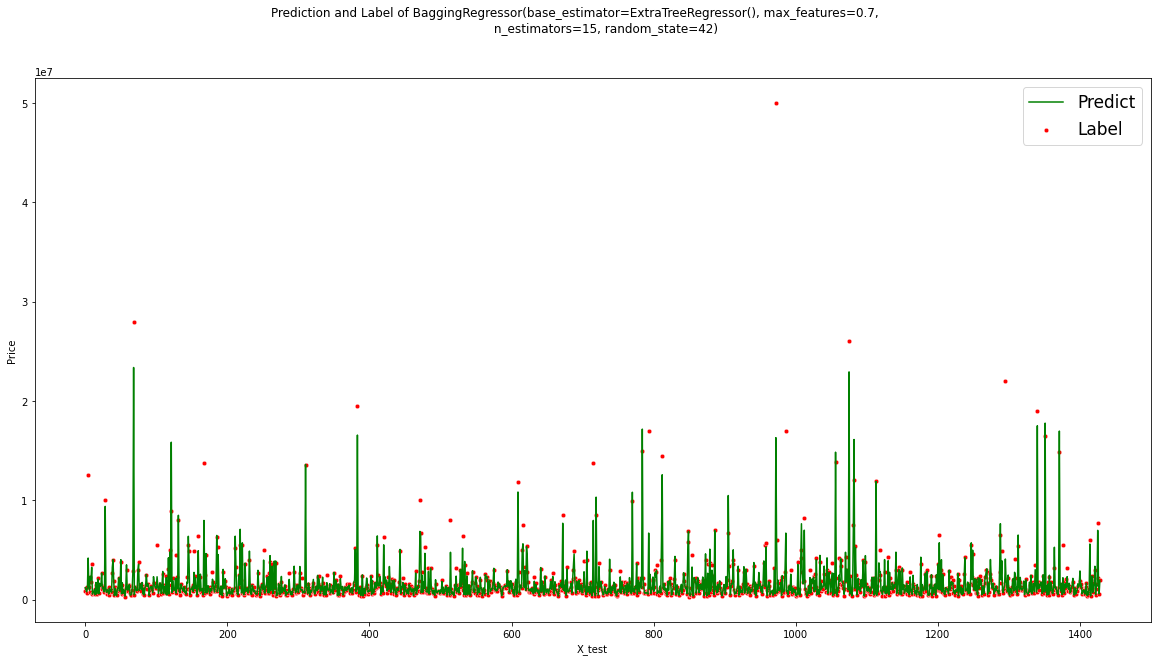





Cross Validation Scores: [ -747018.80865773 -1205055.67242274  -901537.18260909  -714109.03535521
  -640200.14645764  -754802.32793323 -1284514.35076182  -728222.72180531
  -893969.40503793 -1255701.66751213]
Cross val scores Mean: -912513.1318552829
Cross val scores Standard deviation: 232798.4812293603
MSE: 1512396599291.97
RMSE: 1229795.35
R square: 0.76


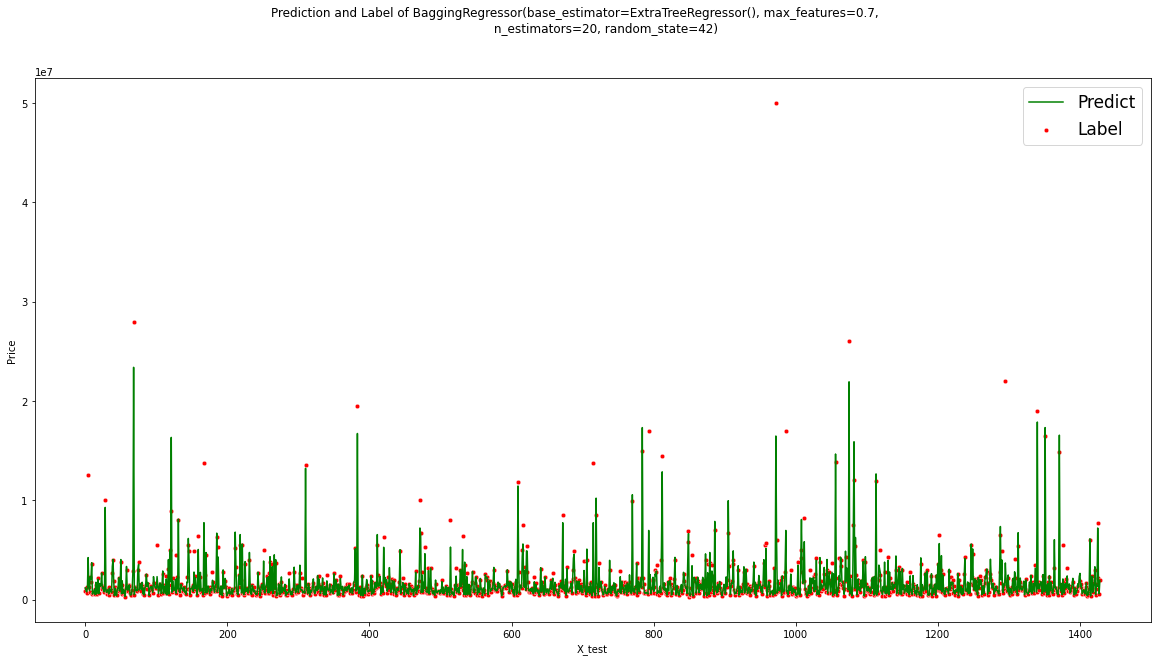





Cross Validation Scores: [-1576001.15590225  -976576.83636193 -1114940.77619816  -741245.56374172
 -1138913.2391129  -1438627.25770912  -675244.08374299  -685188.67930794
  -874255.99282494  -745817.87309405]
Cross val scores Mean: -996681.1457996009
Cross val scores Standard deviation: 301506.9666765306
MSE: 1474682231195.11
RMSE: 1214364.95
R square: 0.77


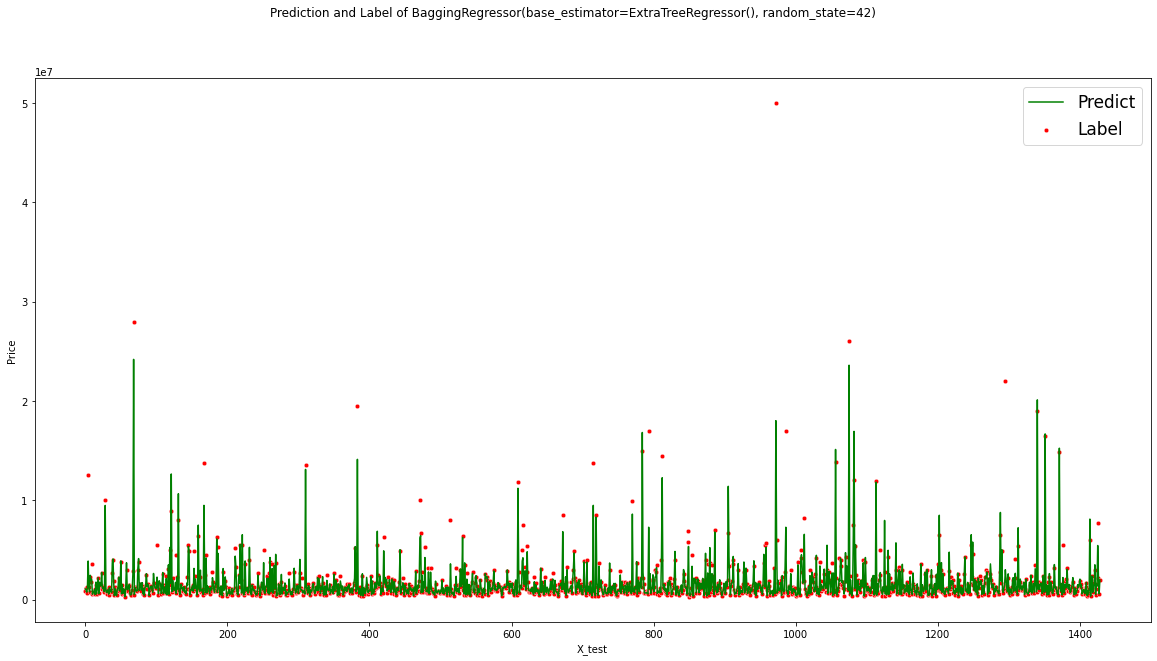





Cross Validation Scores: [ -610109.812178   -1030427.74899005 -1353863.45693522  -862340.64083477
  -766178.92134106 -1763916.93395464  -842620.45686741 -1611403.78507323
  -714911.98642347  -765506.68189327]
Cross val scores Mean: -1032128.0424491127
Cross val scores Standard deviation: 382082.99101116636
MSE: 1210319516048.57
RMSE: 1100145.22
R square: 0.81


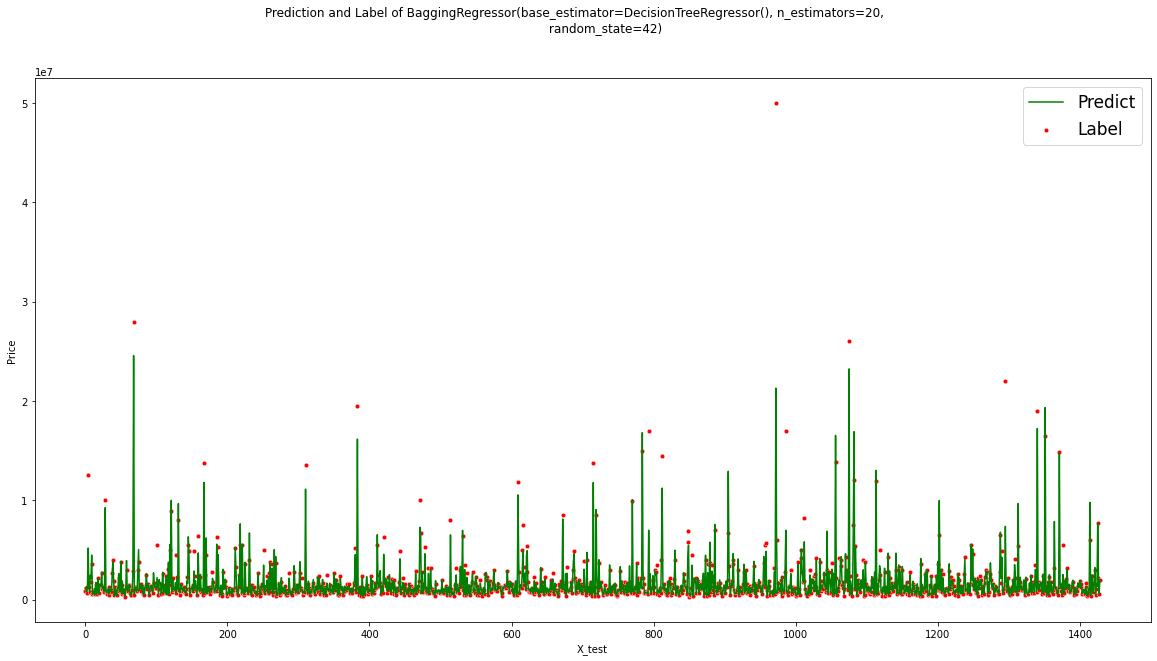





Cross Validation Scores: [ -687360.49309518  -928884.37124626  -784305.58277309 -1650344.41408469
  -802575.10142253  -723097.35513867  -936379.80198716  -773784.48912418
 -1360496.58211623 -1028833.34730607]
Cross val scores Mean: -967606.1538294058
Cross val scores Standard deviation: 293843.6692677546
MSE: 1506395617855.41
RMSE: 1227353.09
R square: 0.76


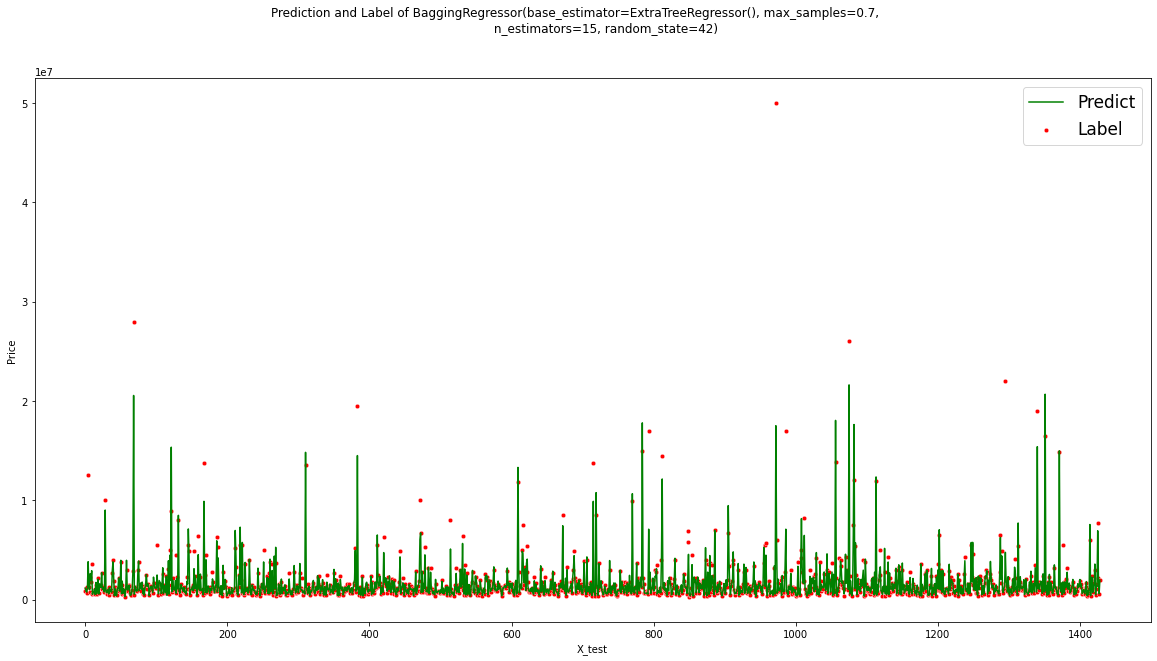





Cross Validation Scores: [-1217186.20254777  -849929.05805129  -605496.26189031 -1227923.15515171
  -757857.69325244  -706853.79999201  -782394.4036598   -675145.19307422
  -897748.59937749 -1445762.92324559]
Cross val scores Mean: -916629.7290242634
Cross val scores Standard deviation: 267278.43955561996
MSE: 1407590814927.58
RMSE: 1186419.33
R square: 0.78


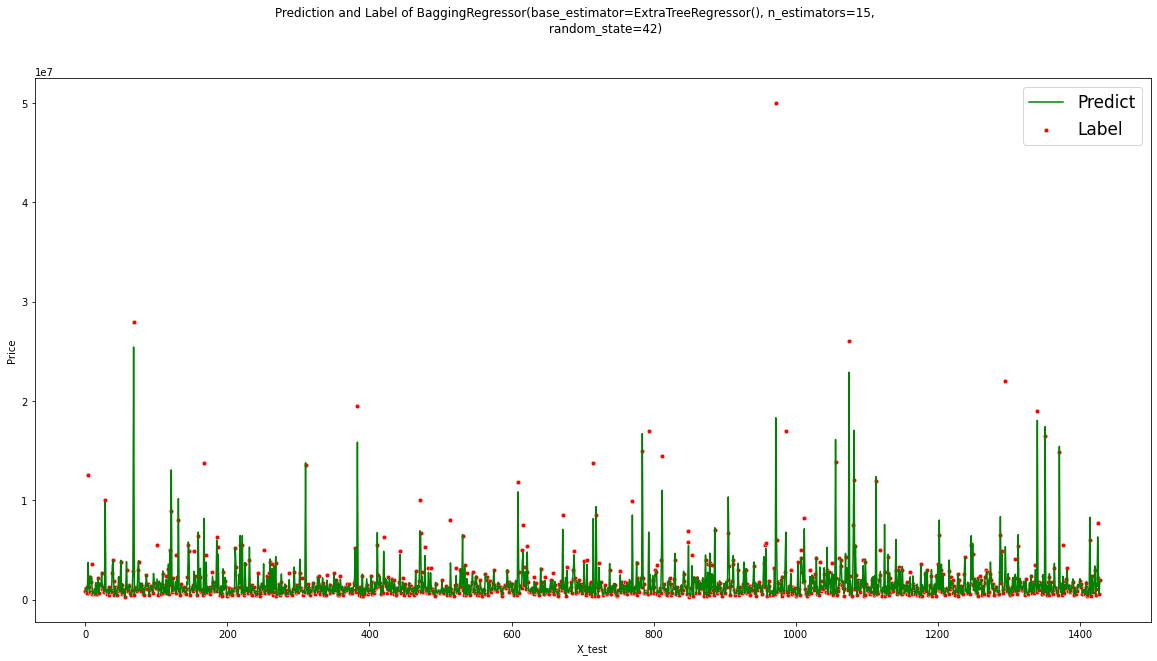





Cross Validation Scores: [-1278333.34369173 -1114891.50624988  -574850.82204231  -749325.03100972
  -823089.92593244  -802698.75689923  -873661.46442913 -1010750.31513144
 -1550489.04006719 -1114563.89793761]
Cross val scores Mean: -989265.4103390665
Cross val scores Standard deviation: 271214.3022573735
MSE: 1676308370388.32
RMSE: 1294723.28
R square: 0.74


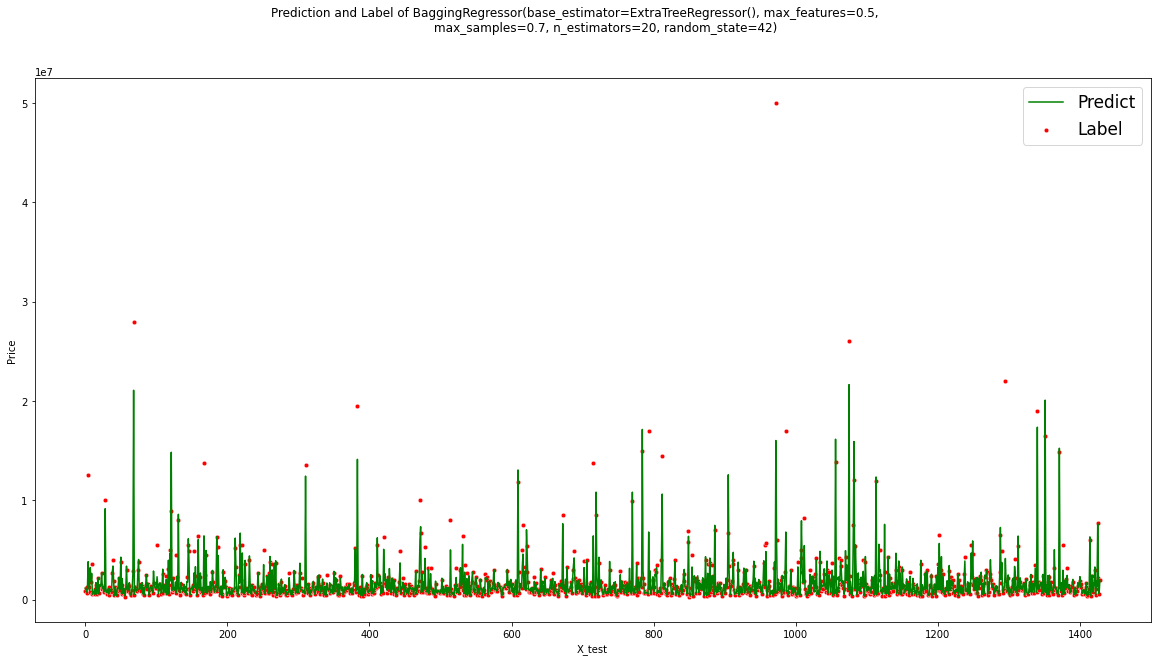





Cross Validation Scores: [ -446183.46602979 -1023635.08839623  -657049.24701858  -725291.12933739
  -948662.89398462 -1144204.35245235  -405611.41874255  -964321.33792834
 -1130775.14980154 -1414865.1906287 ]
Cross val scores Mean: -886059.9274320081
Cross val scores Standard deviation: 306226.1524271301
MSE: 1801459331882.14
RMSE: 1342184.54
R square: 0.72


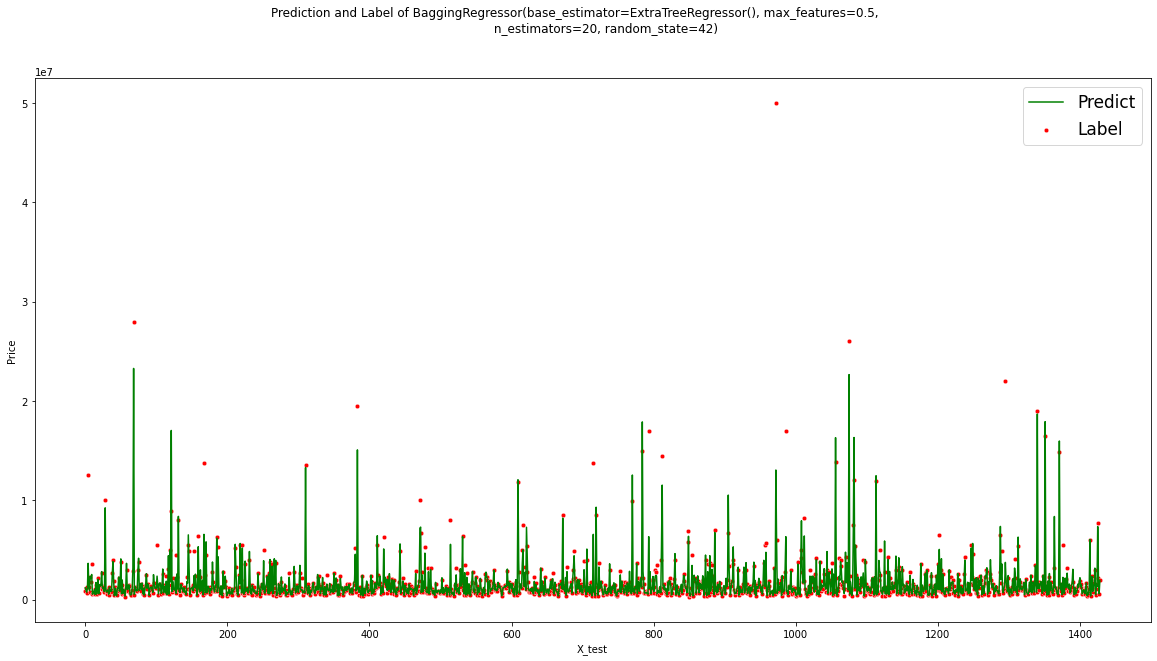





Cross Validation Scores: [-1292614.03007975  -773805.20447786  -853808.53565012  -689735.22384368
  -859775.32330867 -1059509.61910195  -646411.91888829  -845960.27856093
 -1839129.29655752  -645855.1781274 ]
Cross val scores Mean: -950660.4608596176
Cross val scores Standard deviation: 350940.59087992
MSE: 1142345100985.79
RMSE: 1068805.46
R square: 0.82


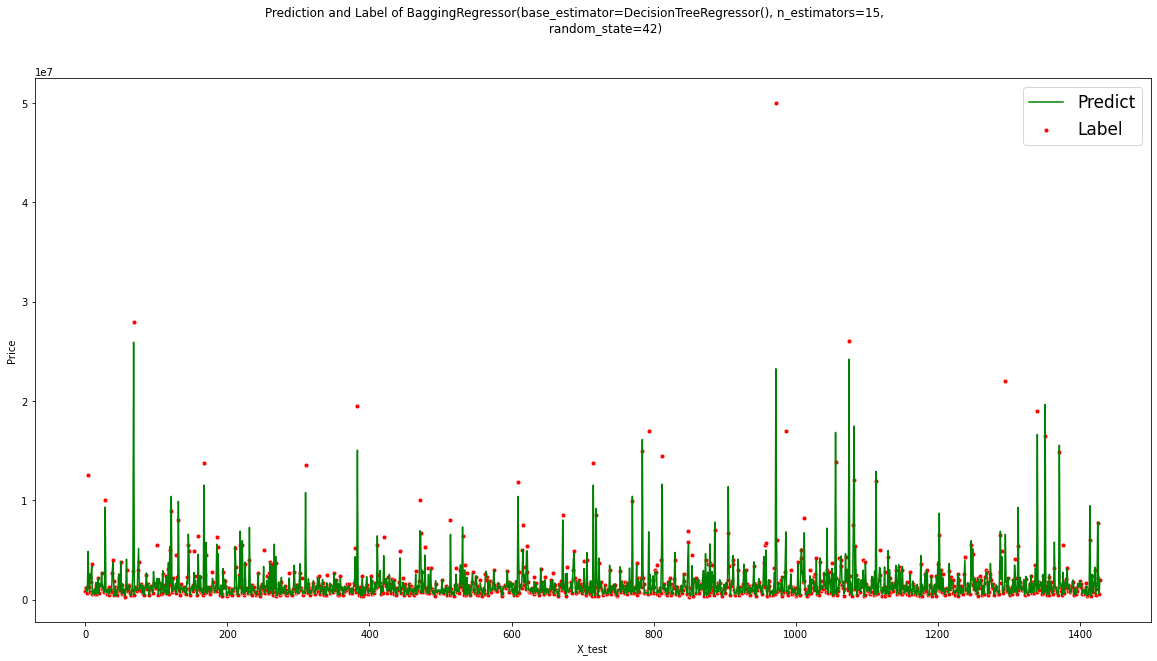





Cross Validation Scores: [ -448306.12274496  -867847.43990883  -596346.46191385 -1448448.76196375
 -1082637.72698233  -942102.38283131  -757824.86582346 -1730562.19243695
  -886615.79879098  -750783.38279565]
Cross val scores Mean: -951147.5136192057
Cross val scores Standard deviation: 365994.97127702285
MSE: 1485201658401.35
RMSE: 1218688.50
R square: 0.77


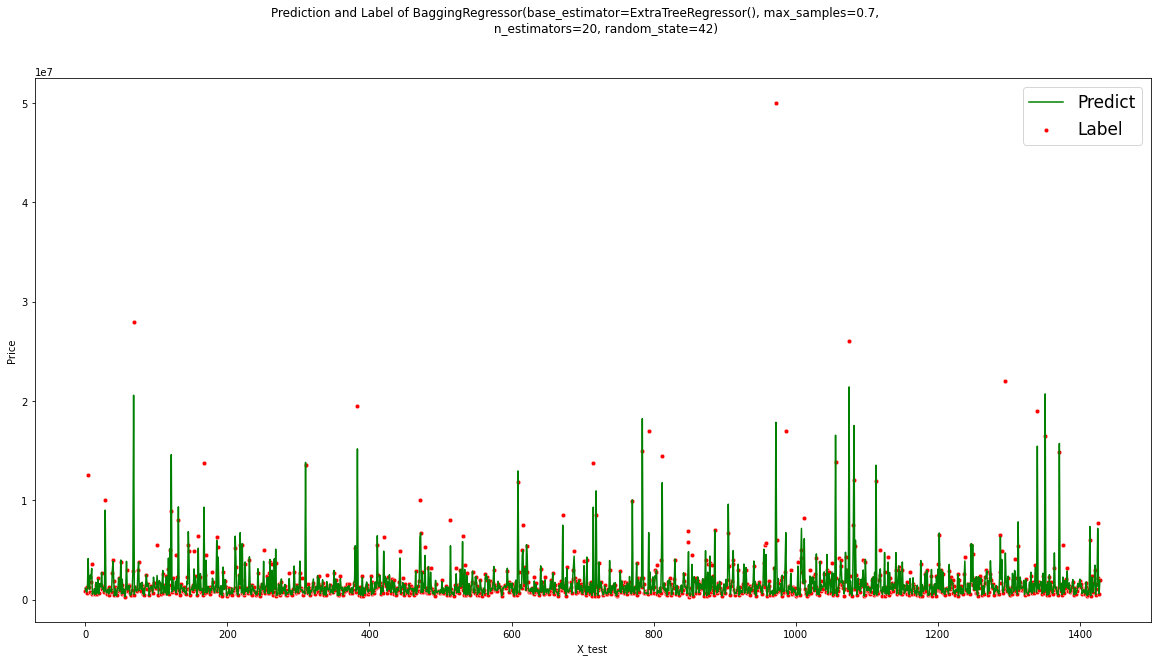





Cross Validation Scores: [ -931073.58434942  -539080.68714625  -690460.15074195  -943074.26748215
  -731008.75273379  -886138.18710037 -1533562.10405365  -815334.55184972
  -657886.99596338 -1121364.44718774]
Cross val scores Mean: -884898.3728608445
Cross val scores Standard deviation: 268262.99820773967
MSE: 1814657067388.80
RMSE: 1347092.08
R square: 0.72


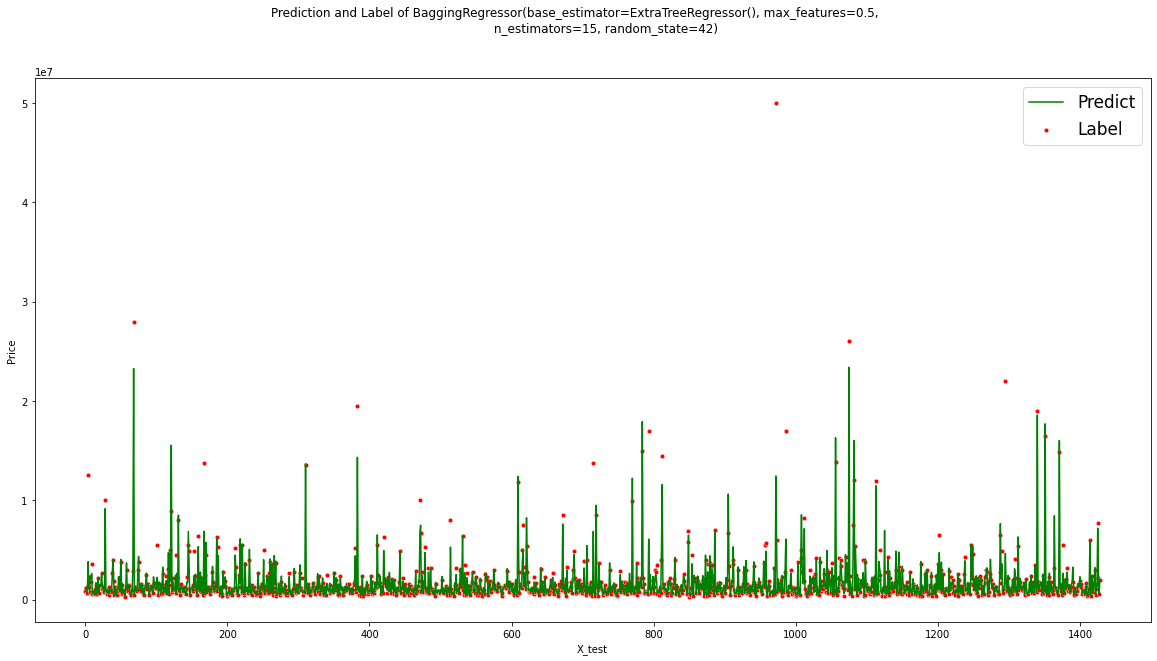





Cross Validation Scores: [ -884185.59673046 -1053450.3865079  -1191716.08953916 -1453461.53080233
  -654518.91374124 -1061337.31204917  -608722.27909902  -991646.70562219
  -606107.68511685  -737219.40709558]
Cross val scores Mean: -924236.5906303909
Cross val scores Standard deviation: 264904.4491281358
MSE: 1674173294444.22
RMSE: 1293898.49
R square: 0.74


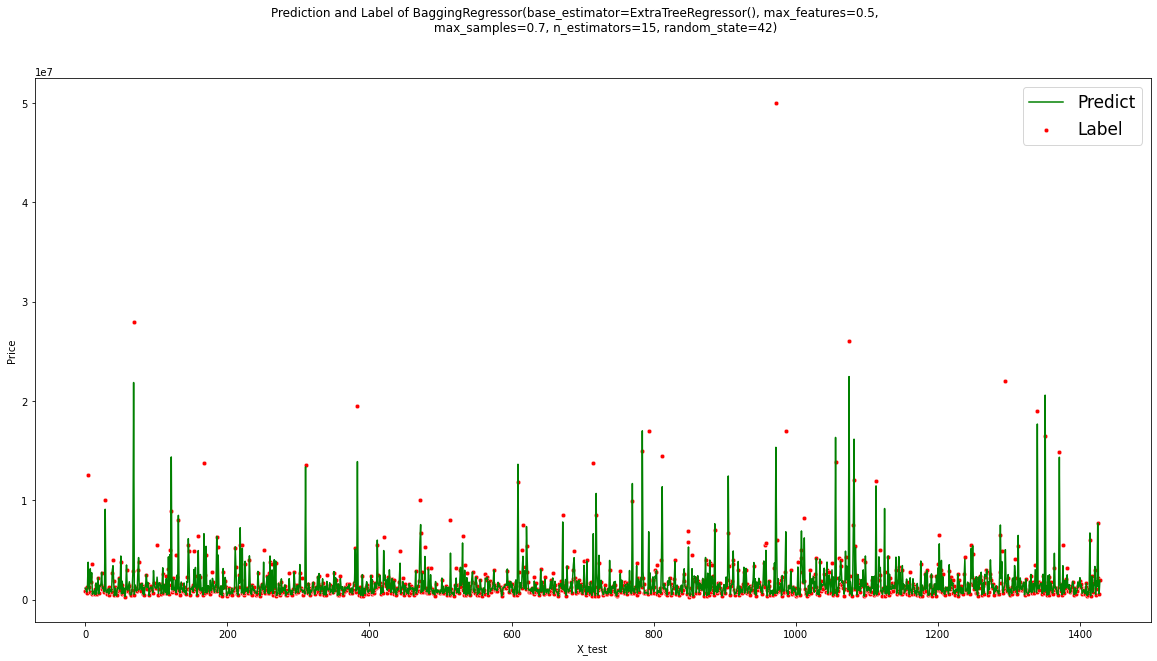





Cross Validation Scores: [ -772104.16489474  -767174.54184214 -1508611.07289037  -725909.69361938
  -617589.3812662  -1125729.12332328  -817681.74635441  -706593.56994345
  -952703.37568614  -943681.90304728]
Cross val scores Mean: -893777.8572867388
Cross val scores Standard deviation: 247771.09605764603
MSE: 1502902773906.25
RMSE: 1225929.35
R square: 0.77


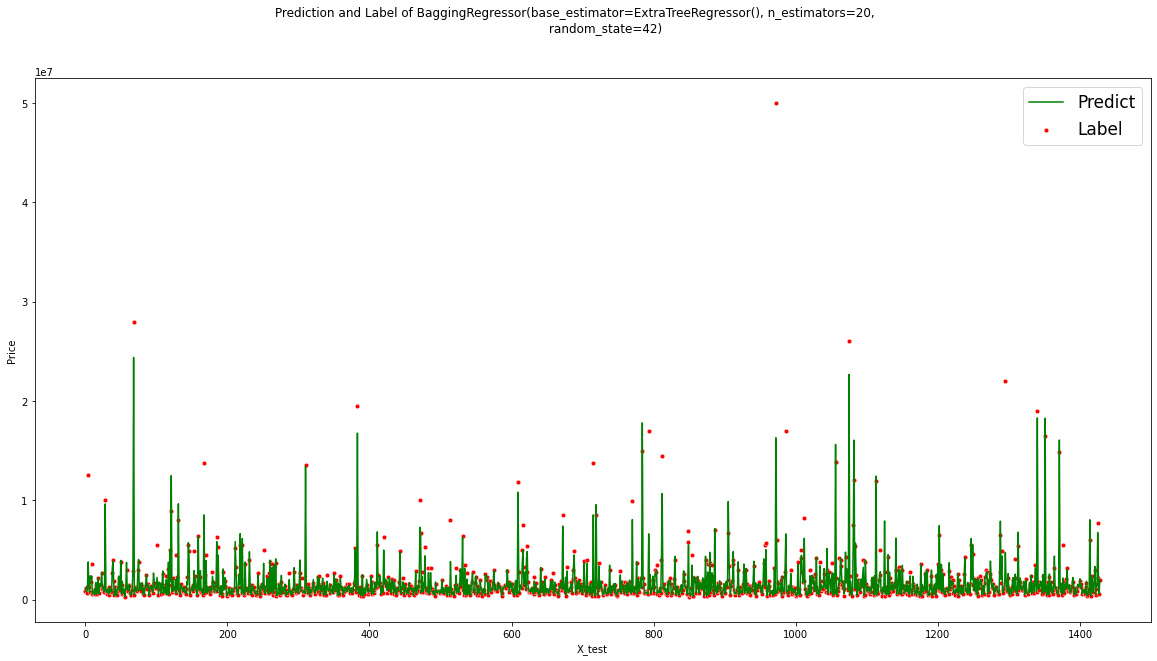





Cross Validation Scores: [ -707123.86937235 -1031357.67435772 -1098285.43867172  -884704.53190078
 -1116151.23160558 -1073663.27627857  -745359.11127854  -759714.31161413
  -565771.91199588 -1574226.11797844]
Cross val scores Mean: -955635.7475053711
Cross val scores Standard deviation: 273827.8990836037
MSE: 1636113340283.93
RMSE: 1279106.46
R square: 0.74


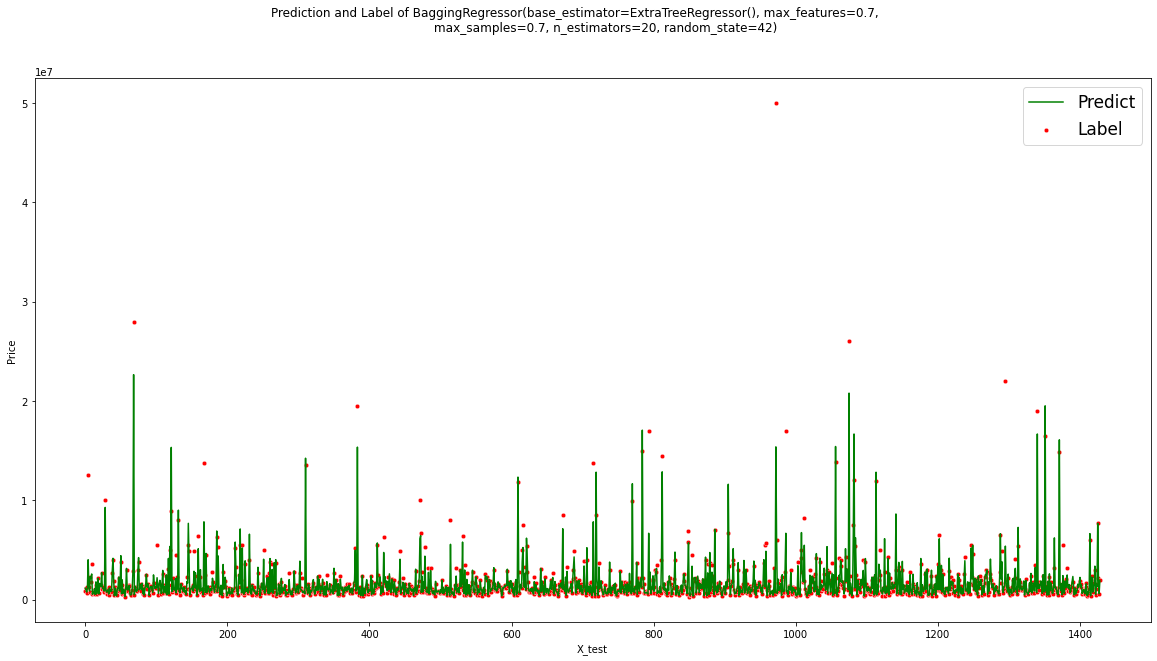





Cross Validation Scores: [-1072552.0543554  -1131341.32541639 -1129002.33753591  -982657.65748654
 -1489809.21830042 -1463023.49563856  -910985.86225984 -1092428.62279299
  -778283.98582539  -997302.32603234]
Cross val scores Mean: -1104738.6885643785
Cross val scores Standard deviation: 212059.05751130113
MSE: 1554921970196.51
RMSE: 1246965.10
R square: 0.76


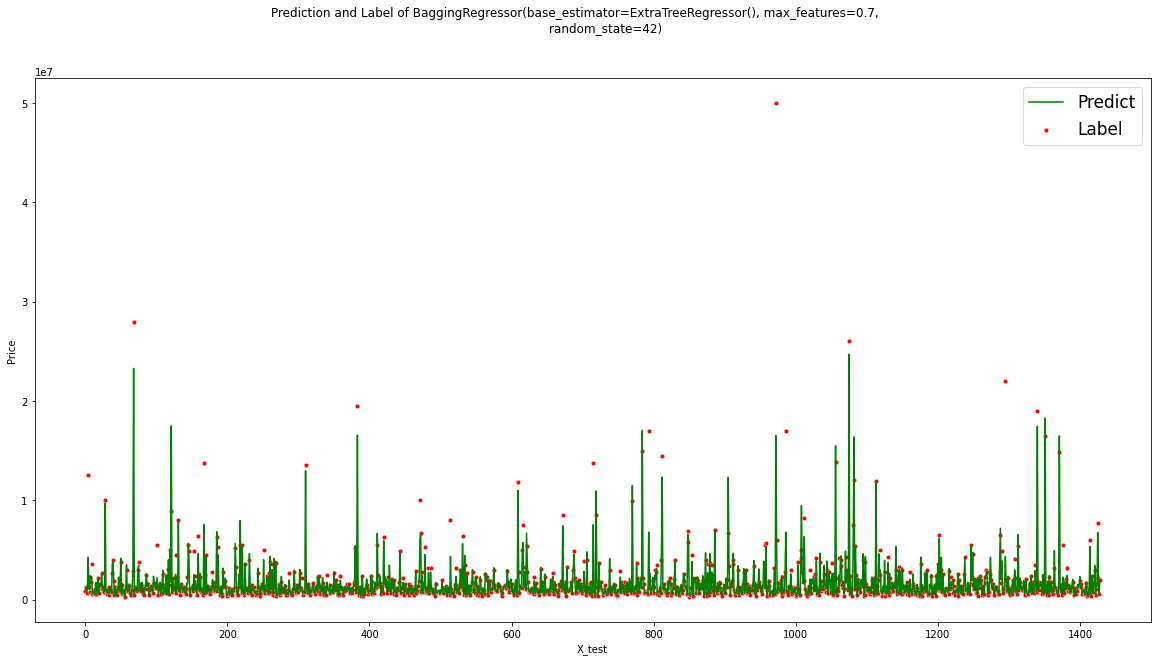

In [ ]:
# show top 15 best params result
for num in range(15):
    best_model = BaggingRegressor(
                    base_estimator = rst_df['param_base_estimator'][num], 
                    n_estimators = rst_df['param_n_estimators'][num],
                    max_samples = rst_df['param_max_samples'][num],
                    max_features = rst_df['param_max_features'][num],
                    random_state=42
                    )
    train_predict(best_model)
    print('\n\n\n')

Default Bagging Regressor

Cross Validation Scores: [ -837367.7830127   -806679.40213188  -811732.72287635 -1349462.9956387
 -1058765.00494591  -681101.86005398 -1706285.31486769  -918926.28074525
 -1078027.50581758  -812027.31908787]
Cross val scores Mean: -1006037.6189177919
Cross val scores Standard deviation: 295467.3890548554
MSE: 1095594500999.92
RMSE: 1046706.50
R square: 0.83


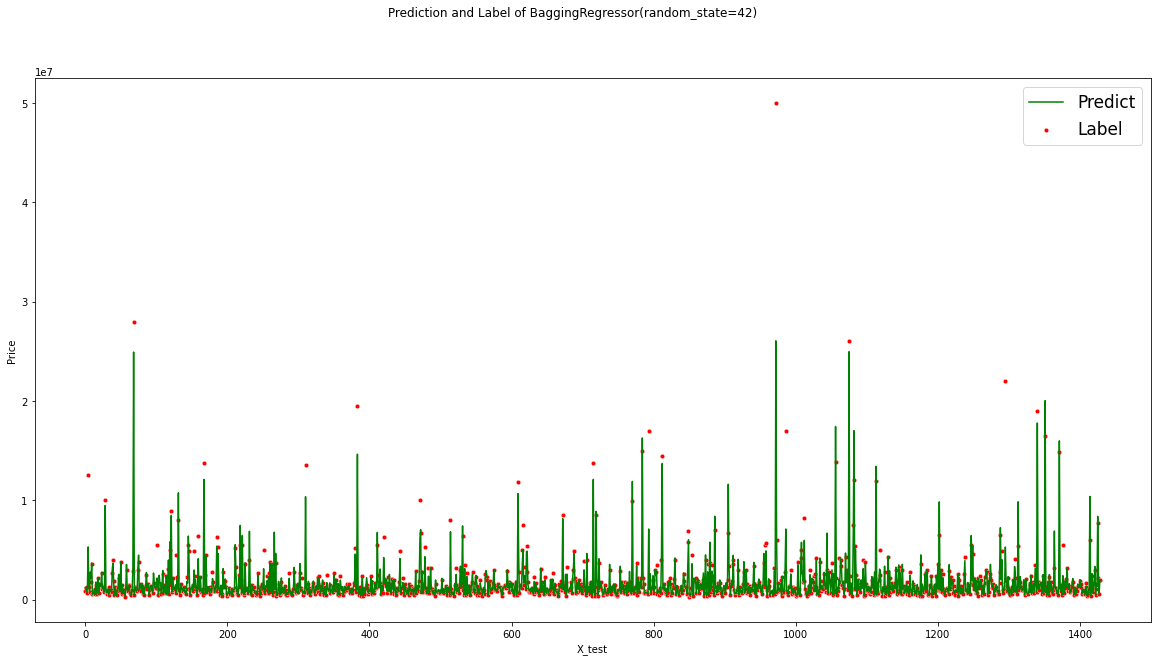

BaggingRegressor(random_state=42)

In [ ]:
train_predict(BaggingRegressor(random_state=42))

## Conclusion

- Default Bagging Regressor has highest perfomance. 



- While Grid Search, ExtraTree was used.
- ExtraTree is:
    - Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree. 
    - While this, I guess model is overfitted in trainset. Girdsearch evaluate model as cross validation so still has chance to stuck in overfit in train data.

# Additional work : 
## Try pipeline without long, lati
---

In [ ]:
## num + cat
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Sequentially apply a list of transforms and a final estimator. 
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array.
# from sklearn.preprocessing import OrdinalEncoder # Encode categorical features as an integer array.
# (sklearn 0.20 version) 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리함 + 판다드 DataFrame과도 잘 동작함
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # 표준화 scaler
from sklearn.preprocessing import MinMaxScaler

# split columns
numerics = ['int16' ,'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics).drop(columns = ['Price', 'Zip', 'Longitude','Latitude'] )
cat_df = df[['City', 'Zip']]
cat_df.Zip = df.Zip.astype(str)

# make pipelines for each numerical and categorical data
num_pipeline = Pipeline([ # list of tuples that are chained, with the last object an estimator
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()), #standard -> minmax로 바꿔보기
    ])

cat_pipeline = Pipeline([ # list of tuples that are chained, with the last object an estimator
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])


# get attributes
num_attribs = list(num_df)
cat_attribs = list(cat_df)

# make full pipeline
full_pipeline1 = ColumnTransformer([      ## num, cat 나눠서 처리하는 이유
        ("num", num_pipeline, num_attribs), # 밀집 행렬을 반환
        ("cat", cat_pipeline, cat_attribs), # 희소 행렬을 반환
    ])

## outlier
full_pipeline2 = ColumnTransformer([      ## num, cat 나눠서 처리하는 이유
        ("num", num_pipeline, num_attribs), # 밀집 행렬을 반환
        ("cat", cat_pipeline, cat_attribs), # 희소 행렬을 반환
    ])

# fit transform it
X_train_transformed = full_pipeline1.fit_transform(X_train)
X_test_transformed = full_pipeline1.transform(X_test)
X_train, X_test = X_train_transformed.toarray(), X_test_transformed.toarray()

## fit transform outliter data
# X_train_outlier_transformed = full_pipeline2.fit_transform(X_train_outlier)
# X_test_outlier_transformed = full_pipeline2.transform(X_test)

In [ ]:
X_train.shape

(5716, 339)

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(random_state=42)

Cross Validation Scores: [ -801662.76818531 -1145655.38224166 -1729514.98407471  -614563.22102701
  -634960.78566391  -947235.43136124  -637121.63707214  -797799.50441554
  -668430.58209661 -1173265.58431828]
Cross val scores Mean: -915020.9880456406
Cross val scores Standard deviation: 334313.4998392337
MSE: 1177908820790.80
RMSE: 1085315.08
R square: 0.82


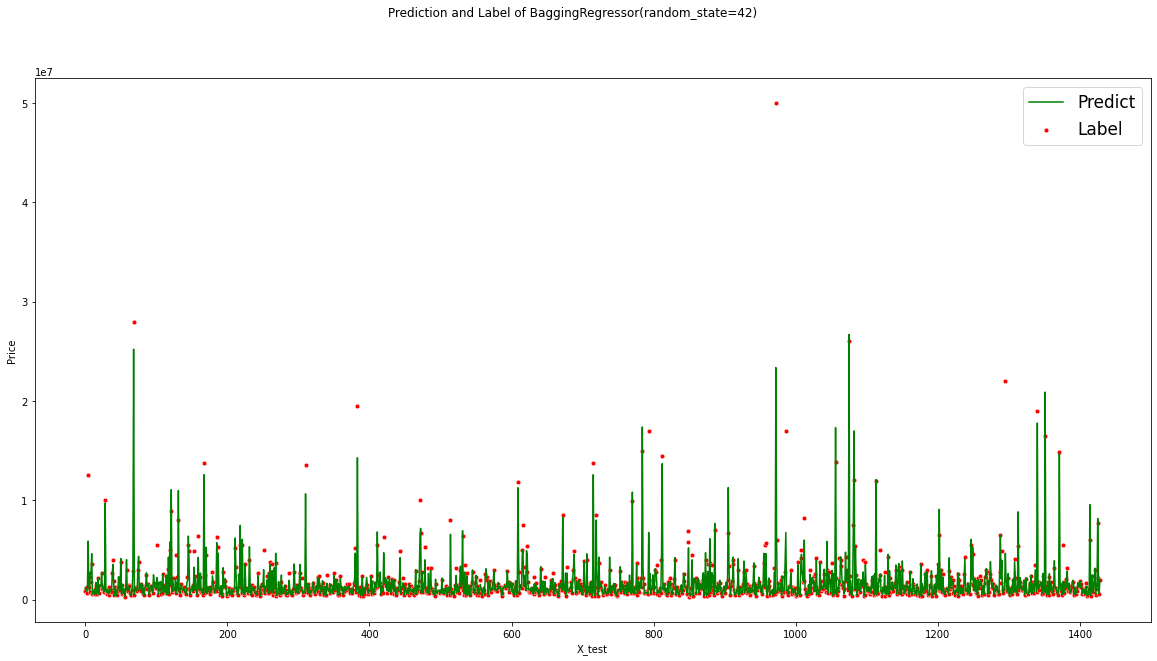

BaggingRegressor(random_state=42)

In [ ]:
train_predict(bag_regressor)

Cross Validation Scores: [-1033559.72481089 -1407964.50355261  -698462.58332406  -800345.48309606
  -717173.26071995 -1273982.11955105 -1316600.23169976  -966761.27575844
  -973784.5878638   -847056.48481445]
Cross val scores Mean: -1003569.0255191072
Cross val scores Standard deviation: 240561.28202399897
MSE: 1563537779260.33
RMSE: 1250415.04
R square: 0.76


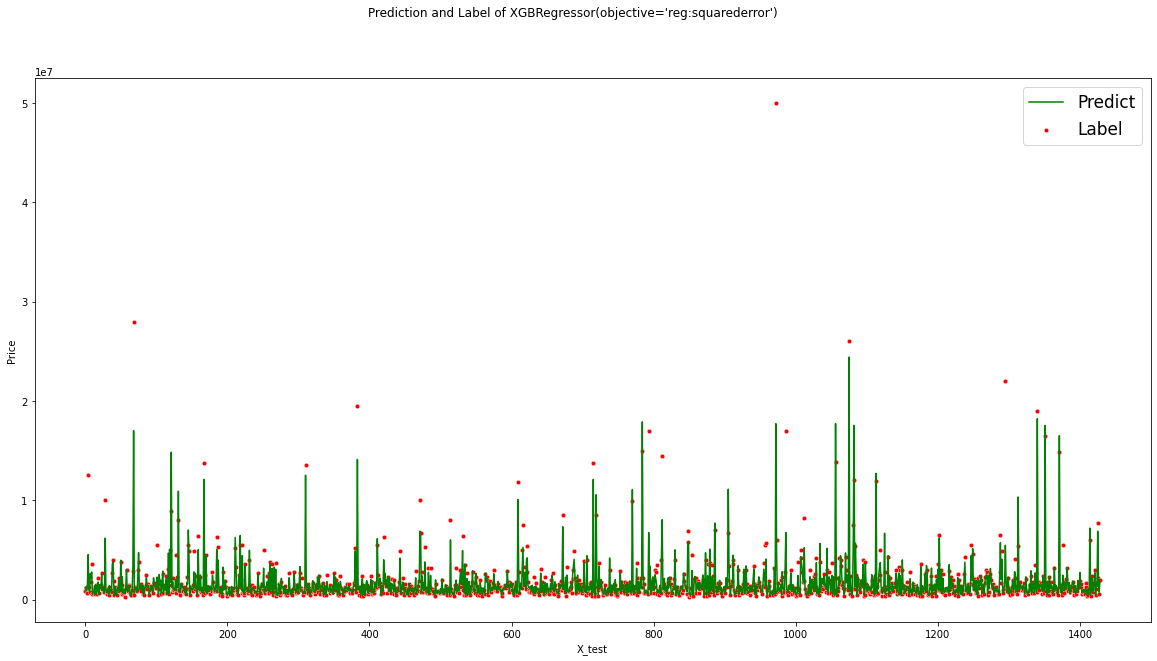

XGBRegressor(objective='reg:squarederror')

In [ ]:
import xgboost as xgb
# Create xgbr classifer object
xgbr = xgb.XGBRegressor(objective ='reg:squarederror') 
train_predict(xgbr)

Cross Validation Scores: [ -708600.09111923 -1098399.99777821 -1283212.38387035  -868097.42071716
  -950786.30827016  -916494.91037844 -1083438.83799196  -697554.26203073
 -1692475.10911656  -670538.63655682]
Cross val scores Mean: -996959.7957829619
Cross val scores Standard deviation: 297994.748466494
MSE: 1494153207636.96
RMSE: 1222355.60
R square: 0.77


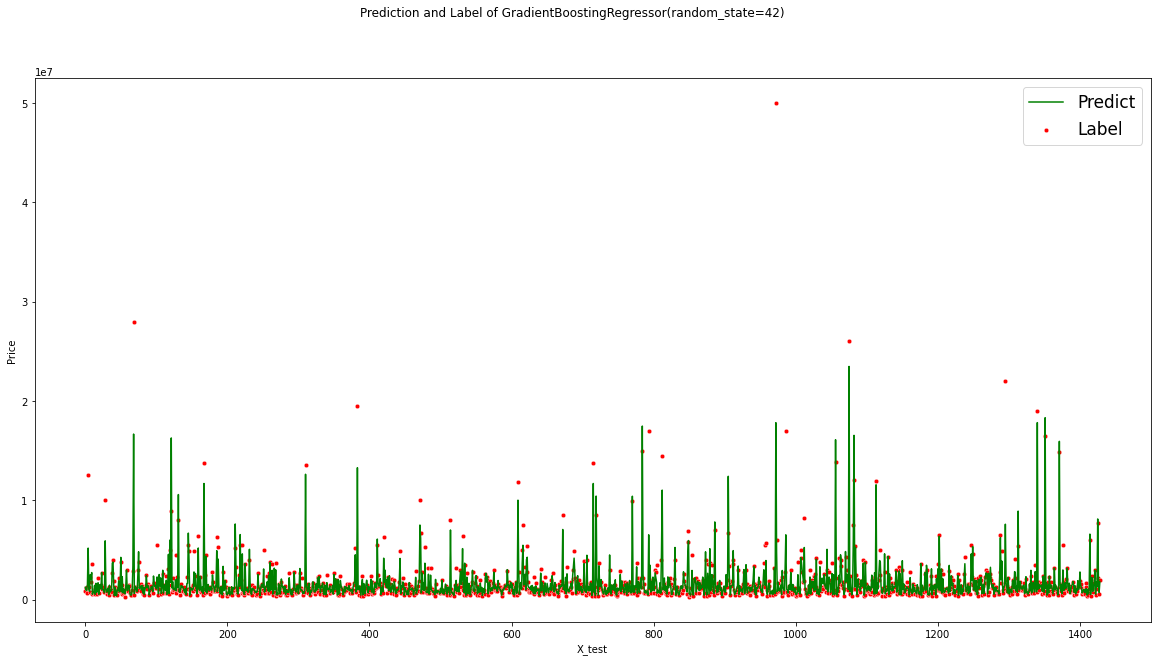

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
train_predict(gb_reg)

Cross Validation Scores: [-1157037.13824062  -913046.25926257 -1536598.05718163  -629070.07315518
  -740122.46724681  -693064.27056472  -753643.11070115  -802345.89139576
 -1371803.14975431  -692204.45669905]
Cross val scores Mean: -928893.487420181
Cross val scores Standard deviation: 300277.73083143425
MSE: 1208834507566.06
RMSE: 1099470.10
R square: 0.81


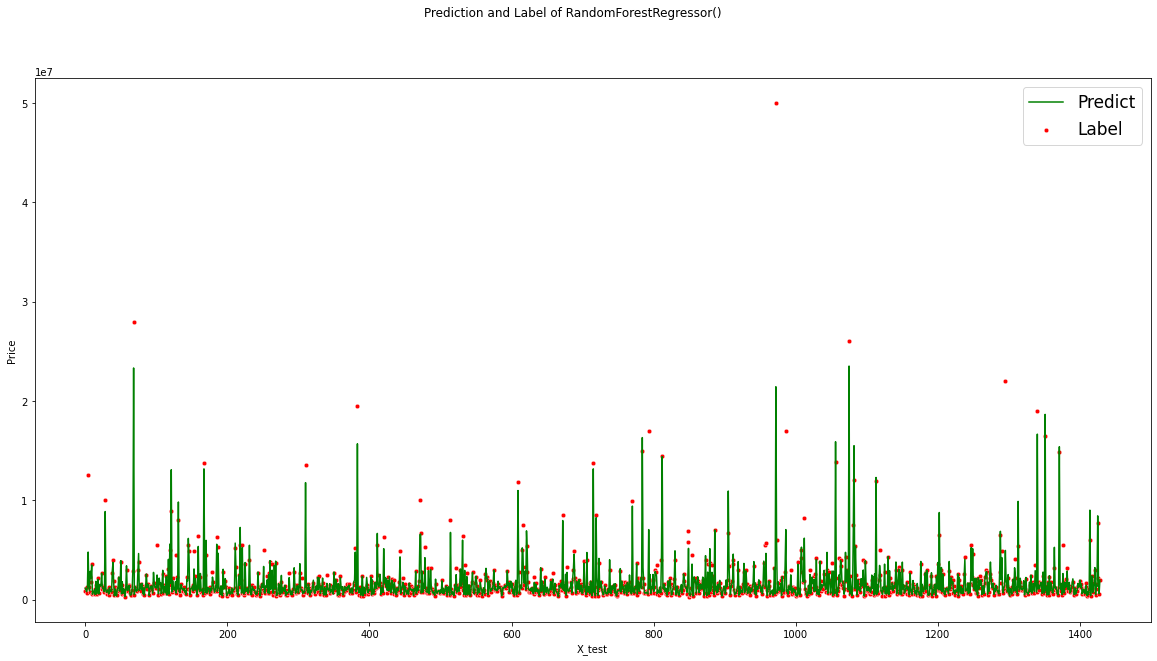

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
train_predict(rf_regressor)

Cross Validation Scores: [ -809939.65614425  -826801.81891949 -1224979.29068172  -840397.17038697
 -1398037.98319471 -1226980.49328308  -936263.45417802 -1183758.59402019
 -1472441.01646881 -1170894.92342156]
Cross val scores Mean: -1109049.4400698796
Cross val scores Standard deviation: 228797.07654085974
MSE: 1715228774337.62
RMSE: 1309667.43
R square: 0.73


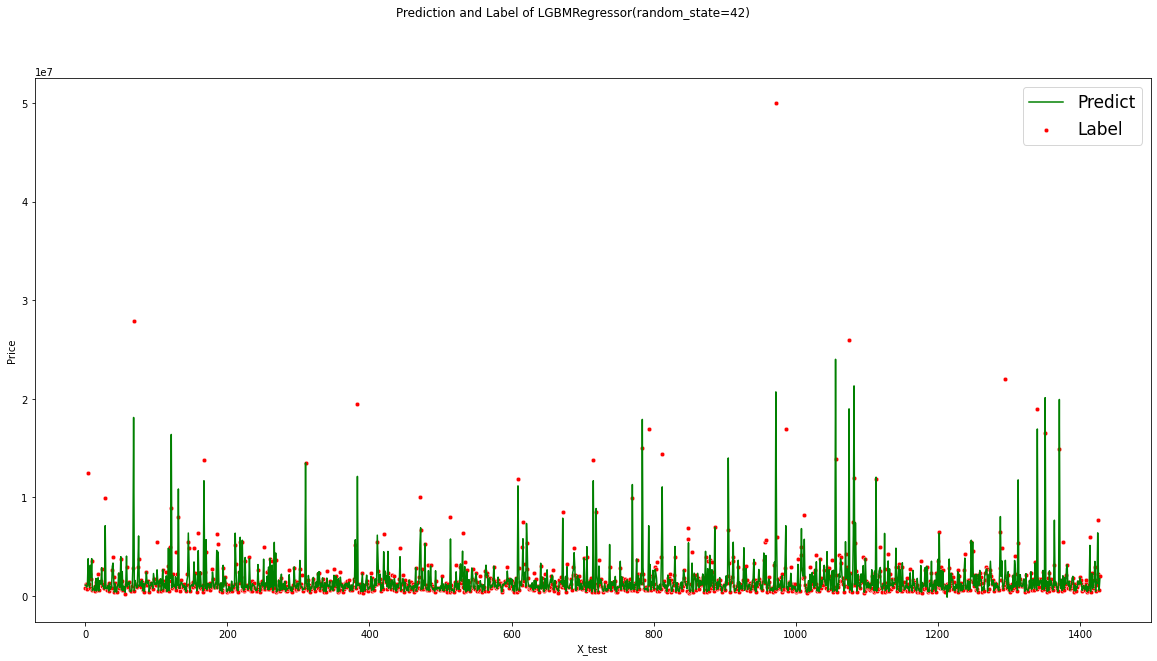

LGBMRegressor(random_state=42)

In [ ]:
import lightgbm as lgb
gbm_regressor = lgb.LGBMRegressor(random_state = 42)
gbm_regressor_tune = lgb.LGBMRegressor(random_state = 42)

train_predict(gbm_regressor)